In [1]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 경고 뜨지 않게 설정
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
sns.set()

# 그래프 기본 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

# 데이터 전처리 알고리즘
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# 학습용과 검증용으로 나누는 함수
from sklearn.model_selection import train_test_split

# 교차 검증
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# 평가함수
# 분류용
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# 회귀용
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 모델의 최적의 하이퍼 파라미터를 찾기 위한 도구
from sklearn.model_selection import GridSearchCV

# 머신러닝 알고리즘 - 분류
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

# 머신러닝 알고리즘 - 회귀
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor

# 차원 축소
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# 군집
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift
from sklearn.cluster import estimate_bandwidth

# 학습 모델 저장을 위한 라이브러리
import pickle

### 데이터를 불러온다.

In [2]:
train_df = pd.read_csv('data/spaceship_train2.csv')
test_df = pd.read_csv('data/spaceship_test2.csv')
all_df = pd.concat([train_df, test_df])
all_df.reset_index(inplace=True, drop=True)

In [3]:
# 데이터 프레임 정보 확인
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12970 entries, 0 to 12969
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    12970 non-null  object 
 1   HomePlanet     12682 non-null  object 
 2   CryoSleep      12660 non-null  object 
 3   Cabin          12671 non-null  object 
 4   Destination    12696 non-null  object 
 5   Age            12700 non-null  float64
 6   VIP            12674 non-null  object 
 7   RoomService    12707 non-null  float64
 8   FoodCourt      12681 non-null  float64
 9   ShoppingMall   12664 non-null  float64
 10  Spa            12686 non-null  float64
 11  VRDeck         12702 non-null  float64
 12  Name           12676 non-null  object 
 13  Transported    8693 non-null   object 
 14  GroupNumber    12970 non-null  int64  
 15  NumberInGroup  12970 non-null  int64  
 16  CabinDeck      12671 non-null  object 
 17  CabinNumber    12671 non-null  float64
 18  CabinS

In [4]:
# 결측치 확인
all_df.isna().sum()

PassengerId         0
HomePlanet        288
CryoSleep         310
Cabin             299
Destination       274
Age               270
VIP               296
RoomService       263
FoodCourt         289
ShoppingMall      306
Spa               284
VRDeck            268
Name              294
Transported      4277
GroupNumber         0
NumberInGroup       0
CabinDeck         299
CabinNumber       299
CabinSide         299
FirstName         294
LastName          294
dtype: int64

### PassengerId
- 승객의 아이디
- GroupNumber와 NumberInGroup으로 분리하였기 때문에 PassengerId는 살펴보지 않는다.
- 제거할 예정

### HomePlanet
- 출발 행성

In [5]:
# 데이터 분포 확인
all_df['HomePlanet'].value_counts()

HomePlanet
Earth     6865
Europa    3133
Mars      2684
Name: count, dtype: int64

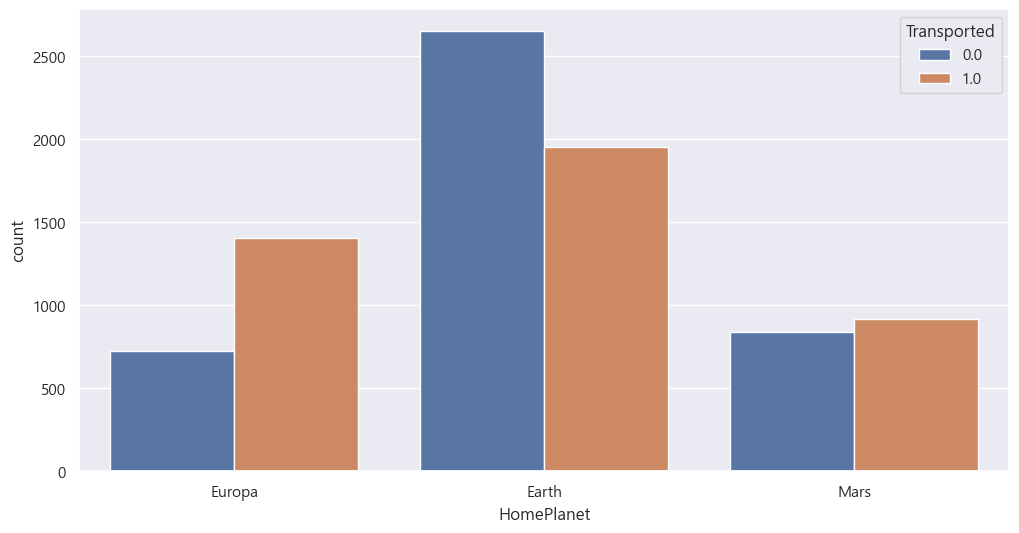

In [6]:
# 결과데이터와의 관계를 살펴본다.
sns.countplot(data=all_df, x='HomePlanet', hue='Transported')
plt.show()

- Europa 인 경우 다른 차원으로 이동했을 확률이 높다
- Earth 인 경우 다른 차원으로 이동하지 않았을 확률이 높다
- Mars 인 경우 다른 차원으로 이동했을 확률이 높지만 비슷하다.

### CryoSleep
- 동면 여부

In [7]:
# 데이터 분포 확인
all_df['CryoSleep'].value_counts()

CryoSleep
False    8079
True     4581
Name: count, dtype: int64

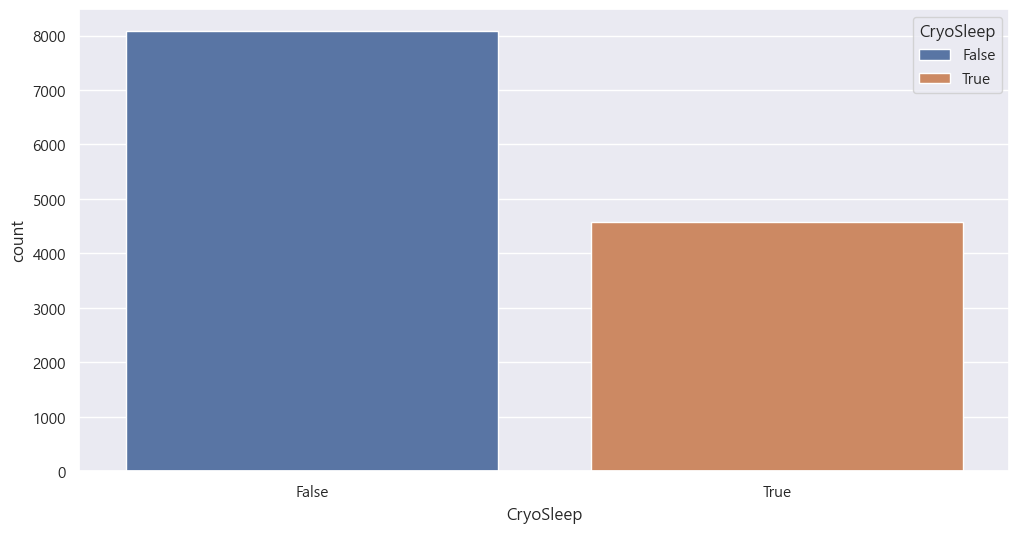

In [8]:
sns.countplot(data=all_df, x='CryoSleep', hue='CryoSleep')
plt.show()

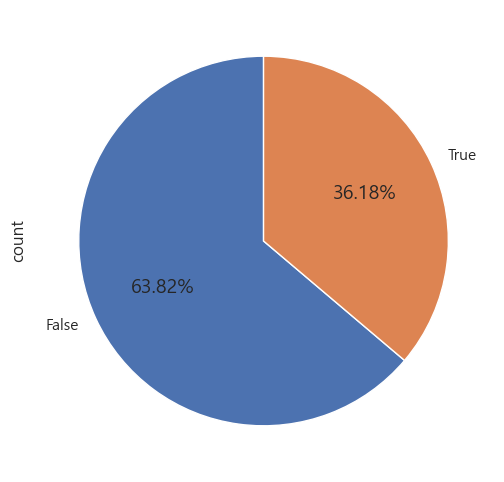

In [9]:
a1 = all_df['CryoSleep'].value_counts()
a1.plot.pie(autopct='%.2f%%', startangle=90)
plt.show()

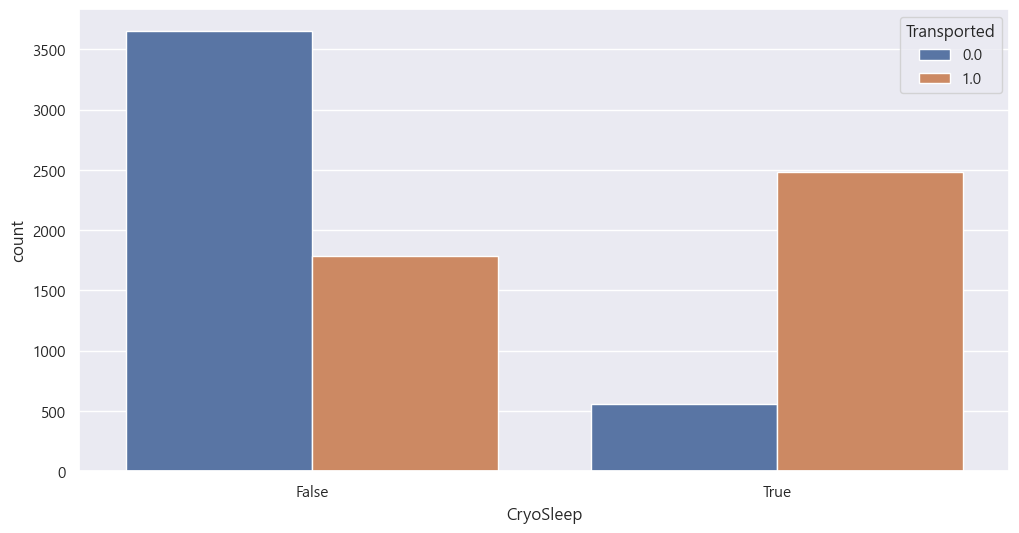

In [10]:
# 결과데이터와의 관계
sns.countplot(data=all_df, x='CryoSleep', hue='Transported')
plt.show()

- 동면을 했을 경우 다른 차원으로 이동했을 확률이 높다
- 동면을 하지 않았을 경우 다른 차원으로 이동하지 않았을 확률이 낮다

### Cabin
- Cabin은 deck/num/side 형태로 되어 있는 데이터이다.
- 이를 통해 데이터를 분리하여 각각 컬럼으로 만들어 두었기 때문에 생성한 컬럼을 분석하도록 한다.
- 제거 대상

### Destination
- 도착지 행성

In [11]:
# 데이터 분포 확인
all_df['Destination'].value_counts()

Destination
TRAPPIST-1e      8871
55 Cancri e      2641
PSO J318.5-22    1184
Name: count, dtype: int64

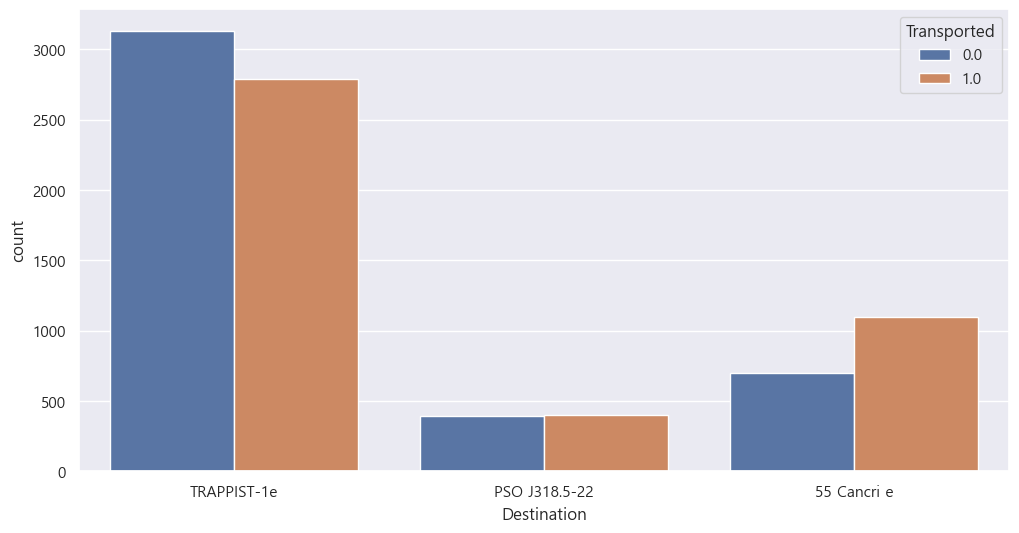

In [12]:
# 결과와의 관계
sns.countplot(data=all_df, x='Destination', hue='Transported')
plt.show()

- 도착지가 TRAPPIST-1e 인 경우 다른 차원으로 이동하지 않았을 확률이 높다(큰 차이가 나지는 않는다)
- 도착지가 PSO J318.5-22 인 경우 비슷하다.
- 도착지가 55 Cancri e 인 경우 다른 차원으로 이동했을 확률이 높다(큰 차이가 나지는 않는다)

### Age
- 승객의 나이

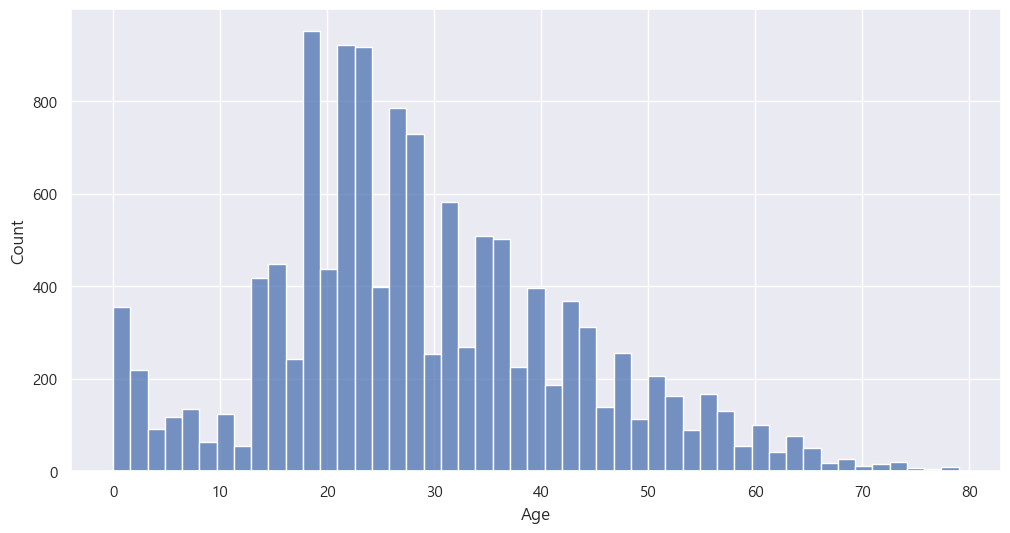

In [13]:
# 나이의 분포를 확인한다.
sns.histplot(data=all_df, x='Age')
plt.show()

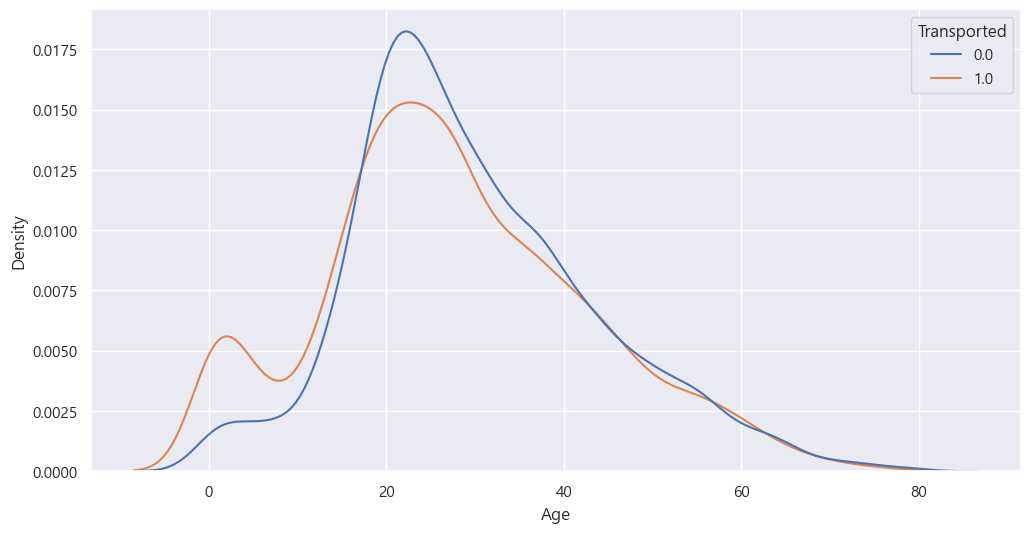

In [14]:
# 결과와의 관계
sns.kdeplot(data=all_df, x='Age', hue='Transported')
plt.show()

- 나이가 0세 부터 10대 후반까지는 다른 차원으로 이동했을 확률이 높다
- 10대 후반에서 부터 40대 초반까지는 다른 차원으로 이동하지 않았을 확률이 높다
- 그 이후에는 비슷하다.
- 연령대별로 비교해볼 수 있도록 하기 위해 연령대 컬럼을 만들어준다.

In [15]:
all_df['Ages'] = all_df['Age'] // 10 * 10
all_df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,Name,Transported,GroupNumber,NumberInGroup,CabinDeck,CabinNumber,CabinSide,FirstName,LastName,Ages
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,...,Maham Ofracculy,0.0,1,1,B,0.0,P,Ofracculy,Maham,30.0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,...,Juanna Vines,1.0,2,1,F,0.0,S,Vines,Juanna,20.0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,...,Altark Susent,0.0,3,1,A,0.0,S,Susent,Altark,50.0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,...,Solam Susent,0.0,3,2,A,0.0,S,Susent,Solam,30.0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,...,Willy Santantines,1.0,4,1,F,1.0,S,Santantines,Willy,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12965,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,...,Jeron Peter,NaN,9266,2,G,1496.0,S,Peter,Jeron,30.0
12966,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,...,Matty Scheron,NaN,9269,1,NaN,NaN,NaN,Scheron,Matty,40.0
12967,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,...,Jayrin Pore,NaN,9271,1,D,296.0,P,Pore,Jayrin,NaN
12968,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,...,Kitakan Conale,NaN,9273,1,D,297.0,P,Conale,Kitakan,NaN


### VIP
- VIP 여부

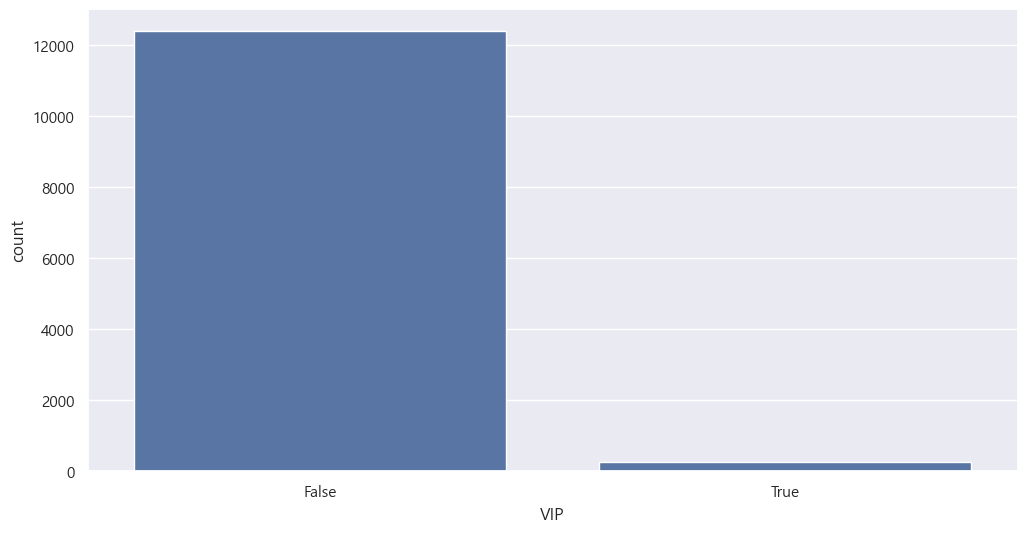

In [16]:
# 데이터의 분포
sns.countplot(data=all_df, x='VIP')
plt.show()

In [17]:
# VIP가 true인 사람이 너무 적어서 도수부터 확인한다.
all_df.groupby(['VIP', 'Transported'])['PassengerId'].count()

VIP    Transported
False  0.0            4093
       1.0            4198
True   0.0             123
       1.0              76
Name: PassengerId, dtype: int64

In [18]:
# 각각의 도수
a1 = all_df.query('VIP == False')['Transported'].value_counts()
a2 = all_df.query('VIP == True')['Transported'].value_counts()

display(a1)
display(a2)

Transported
1.0    4198
0.0    4093
Name: count, dtype: int64

Transported
0.0    123
1.0     76
Name: count, dtype: int64

In [19]:
# 각각의 상대 도수
a1 = all_df.query('VIP == False')['Transported'].value_counts(normalize=True)
a2 = all_df.query('VIP == True')['Transported'].value_counts(normalize=True)
a1.sort_index(inplace=True)

display(a1)
display(a2)

Transported
0.0    0.493668
1.0    0.506332
Name: proportion, dtype: float64

Transported
0.0    0.61809
1.0    0.38191
Name: proportion, dtype: float64

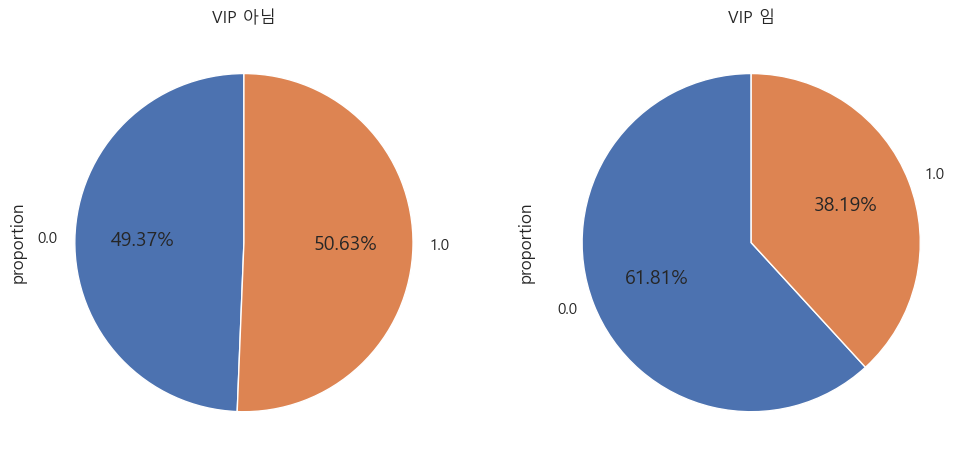

In [20]:
# 각각의 상대 도수
a1 = all_df.query('VIP == False')['Transported'].value_counts(normalize=True)
a2 = all_df.query('VIP == True')['Transported'].value_counts(normalize=True)
a1.sort_index(inplace=True)

plt.subplot(1, 2, 1)
a1.plot.pie(startangle=90, title='VIP 아님', autopct='%.2f%%')

plt.subplot(1, 2, 2)
a2.plot.pie(startangle=90, title='VIP 임', autopct='%.2f%%')

plt.show()

- VIP가 아닐 경우 다른 차원으로 이동했을 확률이 높지만 큰 차이가 나지는 않는다.
- VIP일 경우에는 다른 차원으로 이동하지 않을 확률이 높다.

### RoomService
- RoomService 를 이용했기 때문에 청구된 총 금액

In [21]:
# 데이터 분포
all_df['RoomService'].value_counts()
# RoomService를 이용하지 않은 사람들과 한번이라도 이용한 사람들의 수의 차이가 많이 나기 때문에
# histograme으로 그릴때 bins를 적당히 설정해줘야 한다.

RoomService
0.0       8303
1.0        185
2.0        113
3.0         89
4.0         71
          ... 
263.0        1
271.0        1
922.0        1
3905.0       1
652.0        1
Name: count, Length: 1578, dtype: int64

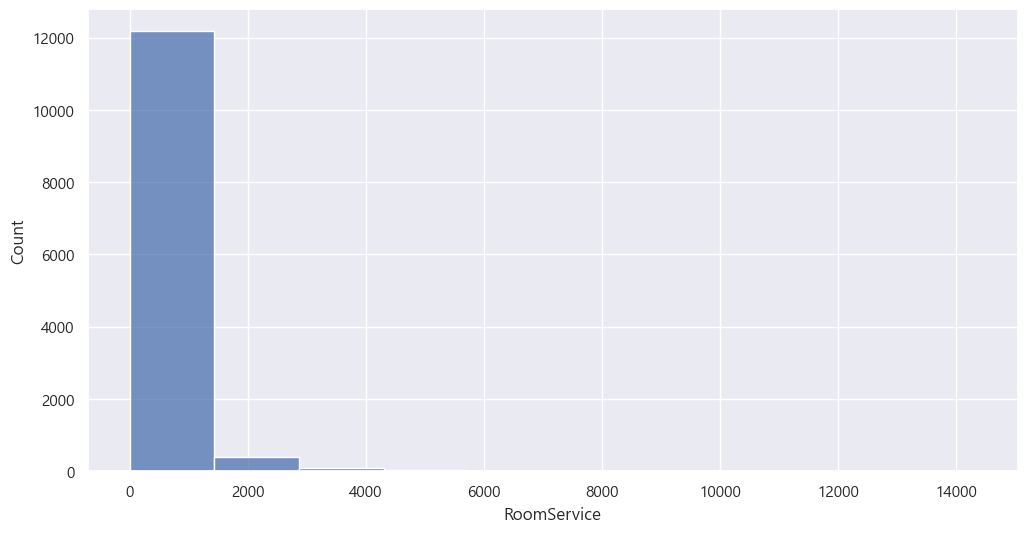

In [22]:
sns.histplot(data=all_df, x='RoomService', bins=10)
plt.show()

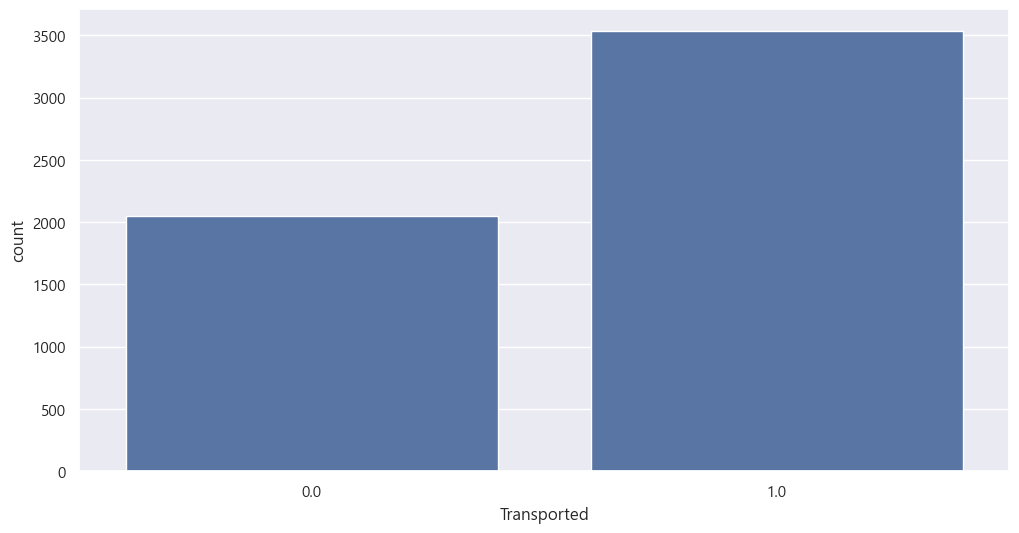

In [23]:
# RoomService가 0인 사람들만 모아서 결과의 관계를 확인한다.
a1 = all_df.query('RoomService == 0.0')
sns.countplot(data=a1, x='Transported')
plt.show()

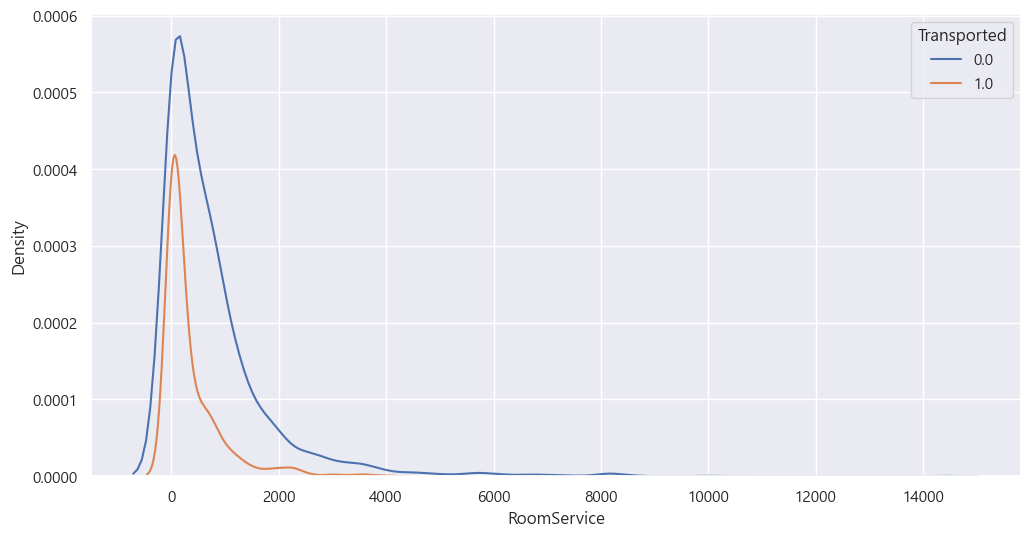

In [24]:
# RoomService가 0이 아닌 사람들의 kde 분포를 확인한다.
a1 = all_df.query('RoomService > 0.0')
sns.kdeplot(data=a1, x='RoomService', hue='Transported')
plt.show()

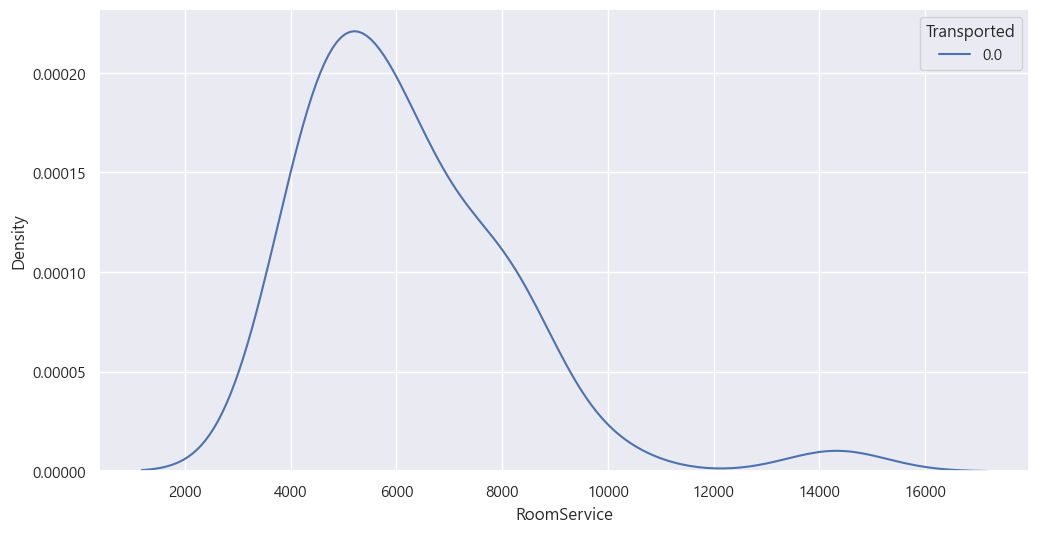

In [25]:
#### 4000보다 큰것 만 가져와서 확인해본다.
a1 = all_df.query('RoomService > 4000.0')
sns.kdeplot(data=a1, x='RoomService', hue='Transported')
plt.show()

In [26]:
a1 = all_df.query('RoomService > 4000.0')
a1['Transported'].value_counts()

Transported
0.0    41
Name: count, dtype: int64

In [27]:
# RoomServiceGrade 컬럼을 추가한다.
# RoomService가 0이면 0
# RoomService가 0 보다 크고 4000 이하면 1
# RoomService가 4000보다 크면 2로 한다.
all_df['RoomServiceGrade'] = 0

a1 = all_df.query('RoomService == 0.0')
all_df.loc[a1.index, 'RoomServiceGrade'] = 0

a1 = all_df.query('RoomService > 0.0 and RoomService <= 4000.0')
all_df.loc[a1.index, 'RoomServiceGrade'] = 1

a1 = all_df.query('RoomService > 4000.0')
all_df.loc[a1.index, 'RoomServiceGrade'] = 2

all_df['RoomServiceGrade'].value_counts()

RoomServiceGrade
0    8566
1    4347
2      57
Name: count, dtype: int64

<Axes: title={'center': '2'}, ylabel='count'>

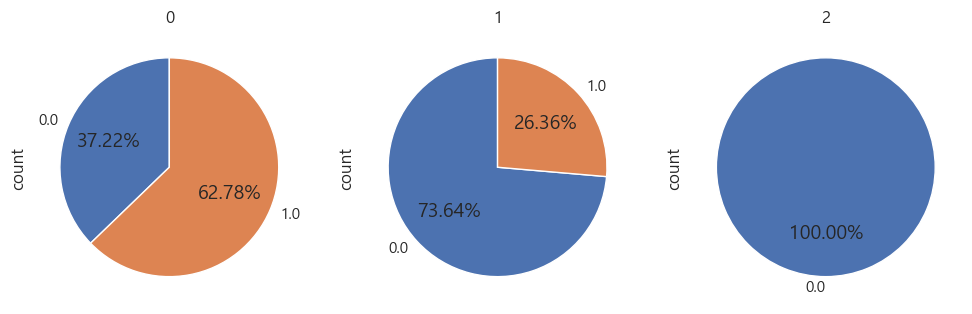

In [28]:
# Transported와의 관계를 그려본다.
plt.subplot(1, 3, 1)
a1 = all_df.query('RoomServiceGrade == 0')['Transported'].value_counts()
a1.sort_index(inplace=True)
a1.plot.pie(startangle=90, title='0', autopct='%.2f%%')

plt.subplot(1, 3, 2)
a1 = all_df.query('RoomServiceGrade == 1')['Transported'].value_counts()
a1.sort_index(inplace=True)
a1.plot.pie(startangle=90, title='1', autopct='%.2f%%')

plt.subplot(1, 3, 3)
a1 = all_df.query('RoomServiceGrade == 2')['Transported'].value_counts()
a1.sort_index(inplace=True)
a1.plot.pie(startangle=90, title='2', autopct='%.2f%%')

- RoomService 사용 금액이 0이면 다른 차원으로 전송됬을 확율이 높다
- RoomService 사용 금액이 높으면 높을 수록 다른 차원으로 전송되지 않았을 확율이 높다.
- RommService 사용 금액이 4000이상이면 다른 차원으로 전송된 사람이 한 명도 없다.

### FoodCourt
- FoodCourt를 이용한 총 금액

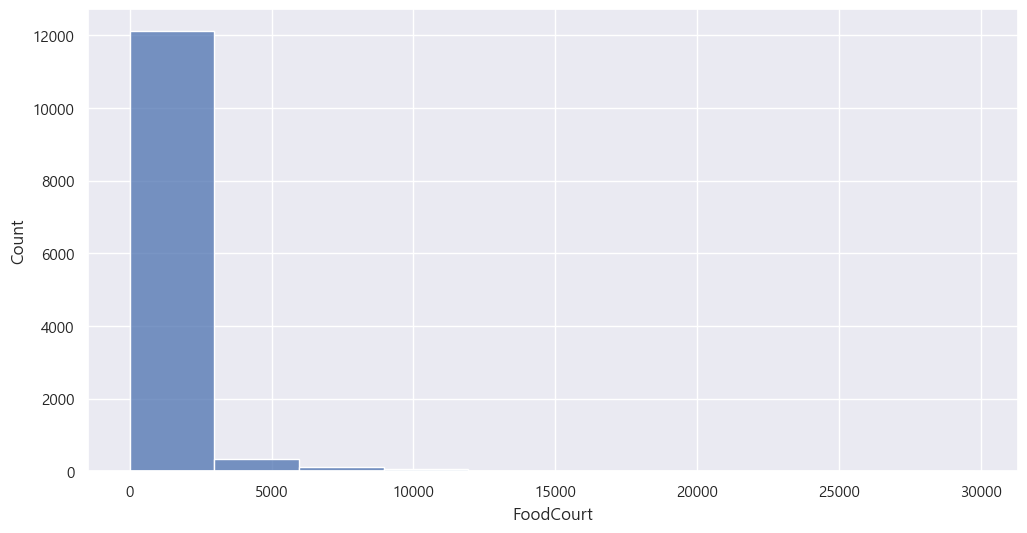

In [29]:
# 데이터의 분포를 확인한다.
sns.histplot(data=all_df, x='FoodCourt', bins=10)
plt.show()

In [30]:
# 도수 분포를 확인해본다.
all_df['FoodCourt'].value_counts()

FoodCourt
0.0        8146
1.0         175
2.0         105
4.0          75
3.0          74
           ... 
2853.0        1
9495.0        1
342.0         1
11552.0       1
601.0         1
Name: count, Length: 1953, dtype: int64

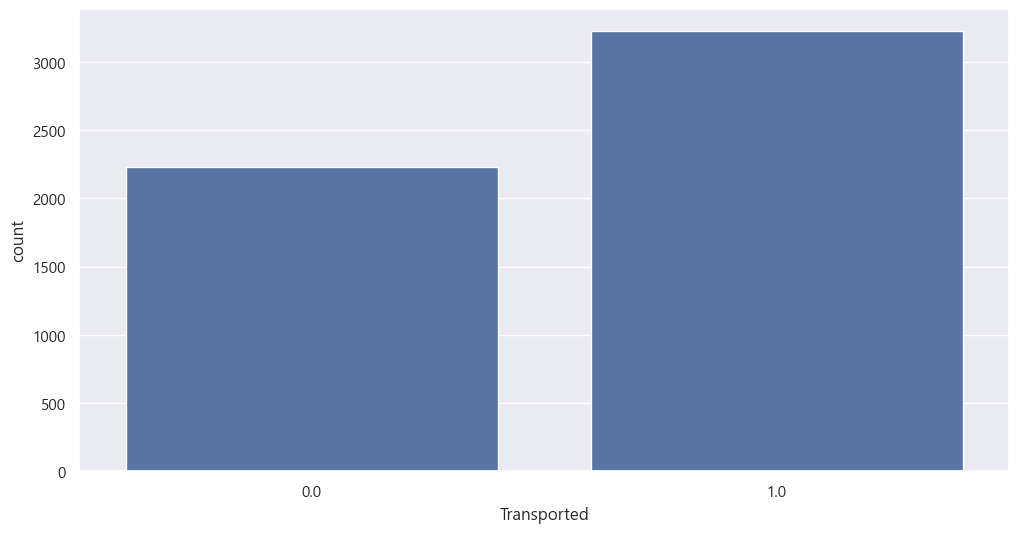

In [31]:
# 사용 금액이 0인 사람들만 확인한다.
a1 = all_df.query('FoodCourt == 0.0')
sns.countplot(data=a1, x='Transported')
plt.show()

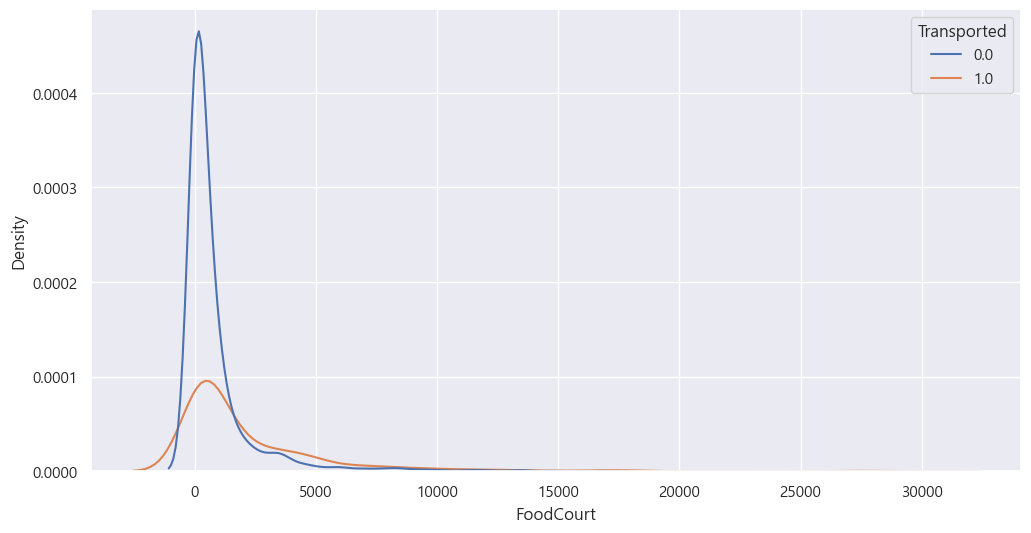

In [32]:
# 사용 금액이 0보다 큰 사람들만 확인한다. 
a1 = all_df.query('FoodCourt > 0.0')
sns.kdeplot(data=a1, x='FoodCourt', hue='Transported')
plt.show()

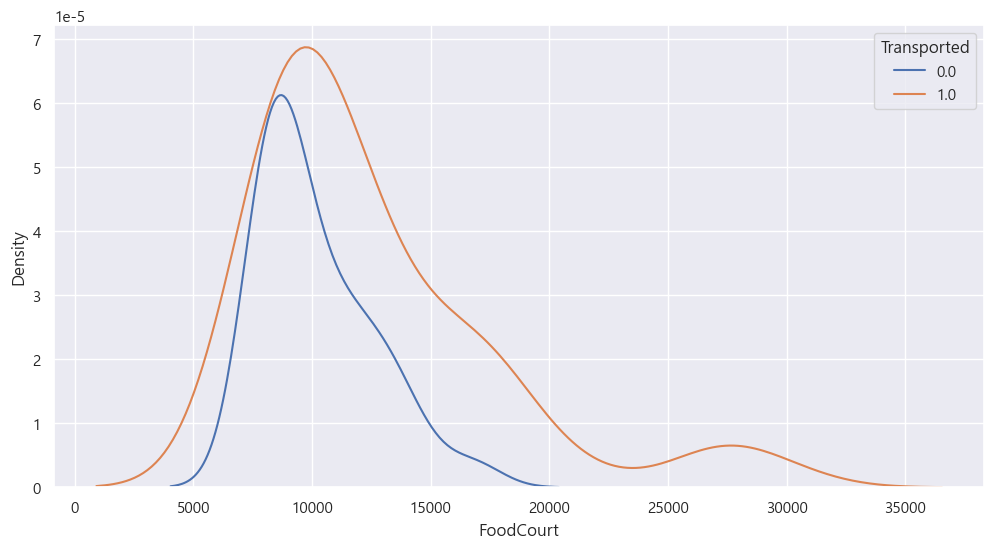

In [33]:
# 사용 금액이 7500보다 큰 사람들만 확인한다. 
a1 = all_df.query('FoodCourt > 7500.0')
sns.kdeplot(data=a1, x='FoodCourt', hue='Transported')
plt.show()

- FoodCourt를 한번도 이용하지 않은 사람들의 다른 차원으로 전송됬을 확율이 조금 높다.
- 총 금액이 약 2000보다 작은 경우에는 다른 차원으로 전송이 않됬을 확률이 높다.
- 약 2000 이상인 경우에는 다른 차원으로 전송됬을 확률이 높다.

### ShoppingMall
- ShoppingMall을 이용한 총 금액

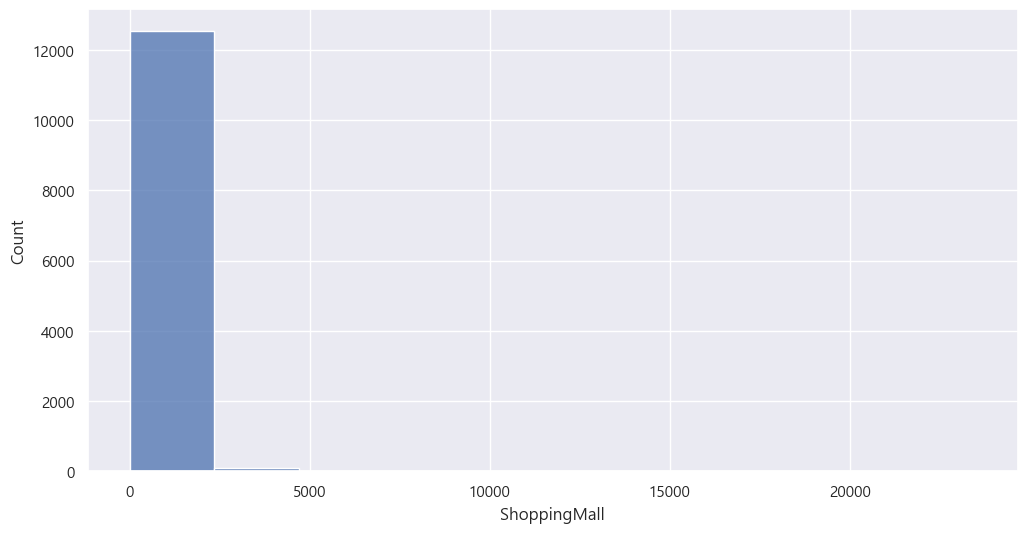

In [34]:
# 데이터의 분포를 확인해본다.
sns.histplot(data=all_df, x='ShoppingMall', bins=10)
plt.show()

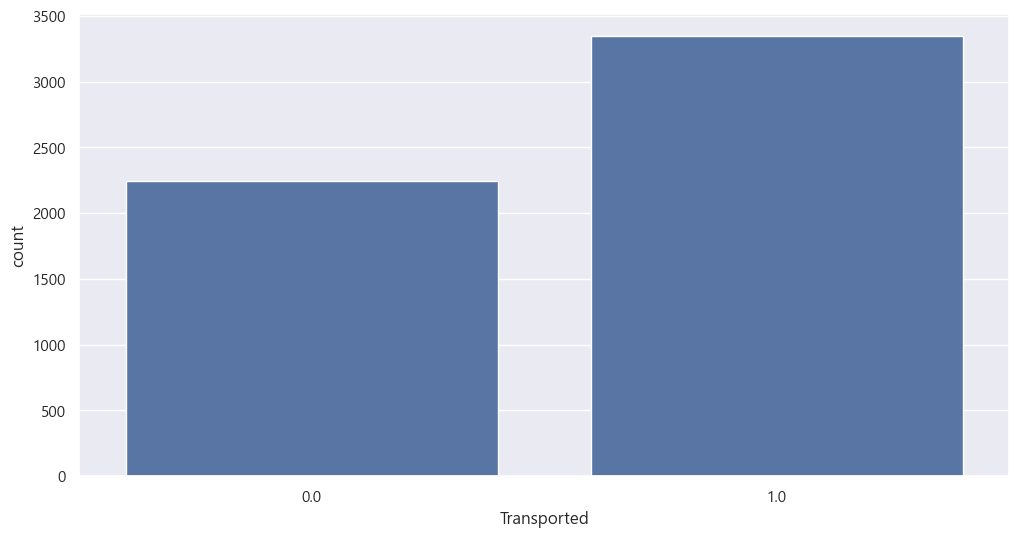

In [35]:
# Shopping이 0인 사람들만 모아서 확인한다.
a1 = all_df.query('ShoppingMall == 0.0')
sns.countplot(data=a1, x='Transported')
plt.show()

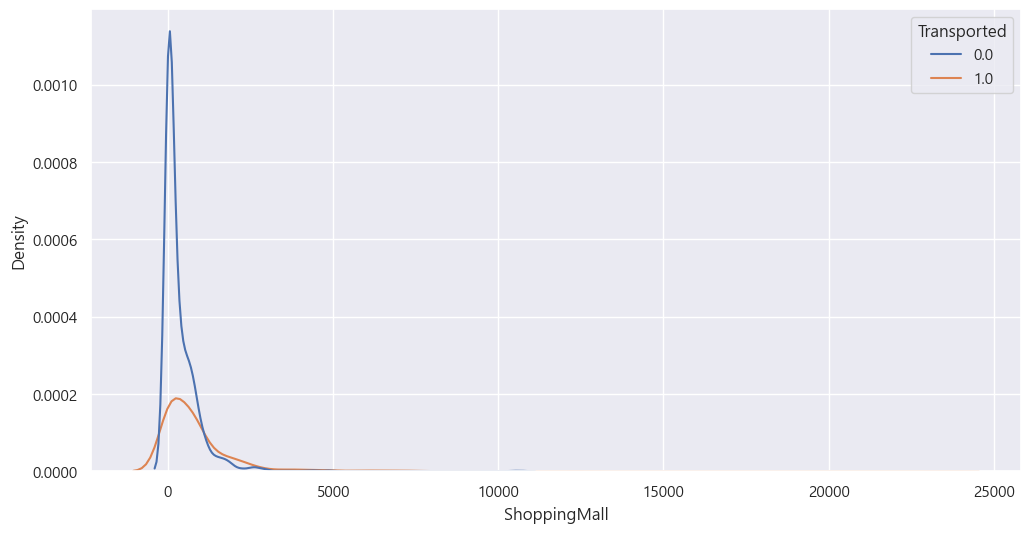

In [36]:
# Shopping이 0보다 큰 사람들만 모아서 확인한다.
a1 = all_df.query('ShoppingMall > 0.0')
sns.kdeplot(data=a1, x='ShoppingMall', hue='Transported')
plt.show()

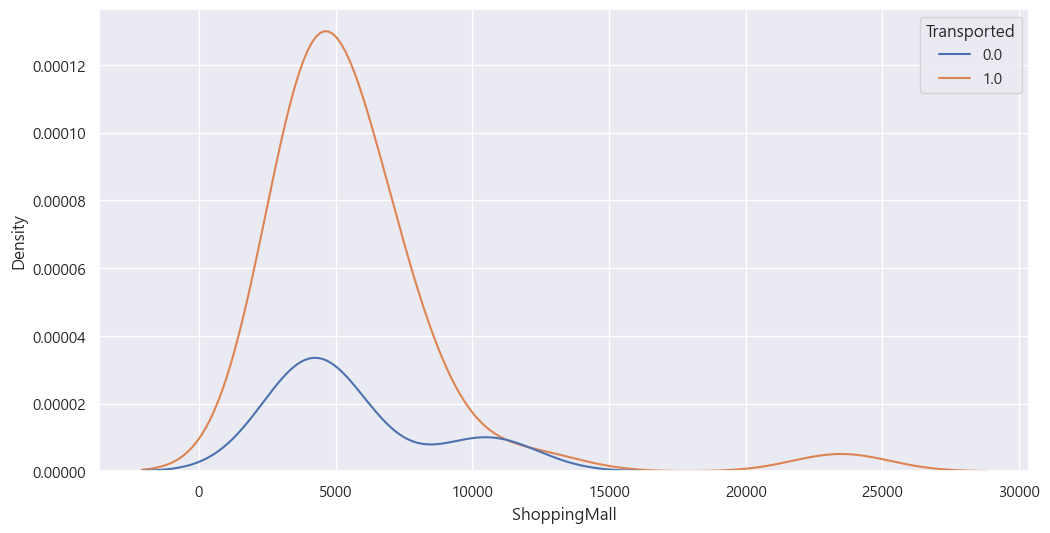

In [37]:
# Shopping이 3000보다 큰 사람들만 모아서 확인한다.
a1 = all_df.query('ShoppingMall > 3000.0')
sns.kdeplot(data=a1, x='ShoppingMall', hue='Transported')
plt.show()

In [38]:
# Shopping이 15000보다 큰 사람들만 모아서 확인한다.
a1 = all_df.query('ShoppingMall > 15000.0')
a1
# 한명밖에 없으므로 3000보다 큰 사람들 데이터만 확인한다.

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,Transported,GroupNumber,NumberInGroup,CabinDeck,CabinNumber,CabinSide,FirstName,LastName,Ages,RoomServiceGrade
8415,8989_01,Europa,False,B/291/P,TRAPPIST-1e,17.0,False,0.0,366.0,23492.0,...,1.0,8989,1,B,291.0,P,NaN,NaN,10.0,0


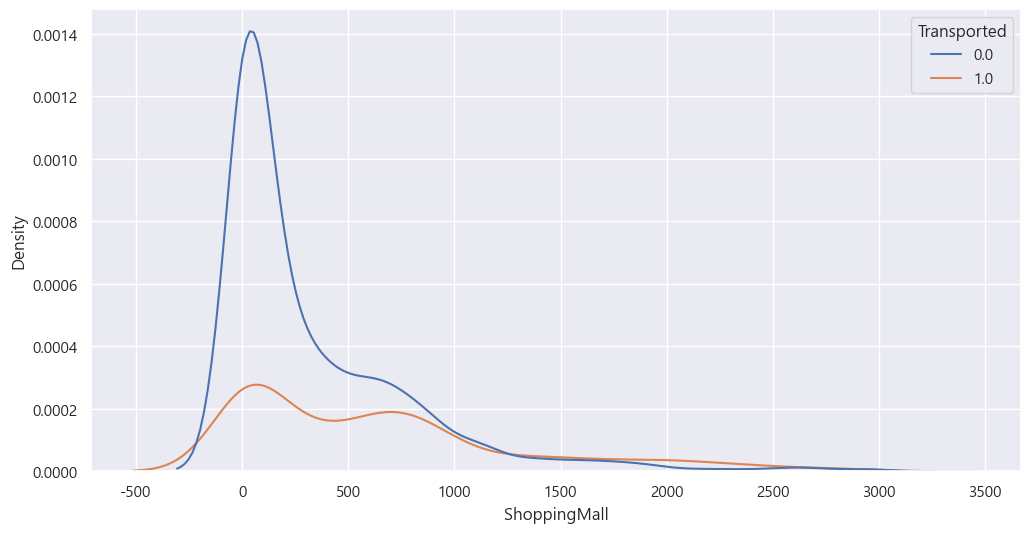

In [39]:
# Shopping이 0초과 3000이하인 사람들만 모아서 확인한다.
a1 = all_df.query('ShoppingMall > 0.0 and ShoppingMall <= 3000.0')
sns.kdeplot(data=a1, x='ShoppingMall', hue='Transported')
plt.show()

- ShoppingMall을 한번도 이용하지 않은 사람들은 전송됬을 확율이 약간 높다.
- 한번이라도 이용한 사람들 중에 총 금액이 약 1250 이하인 경우 전송되지 않았을 확율이 높다
- 이 외의 사람들은 전송된 확률이 조금 높다.

### Spa
- Spa를 이용한 총 금액

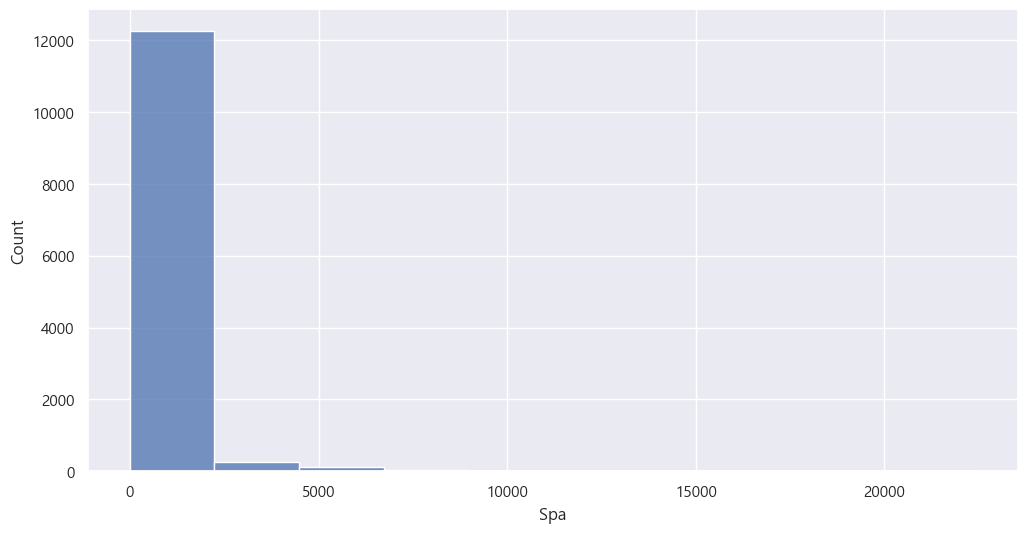

In [40]:
# 데이터 분포를 확인한다.
sns.histplot(data=all_df, x='Spa', bins=10)
plt.show()

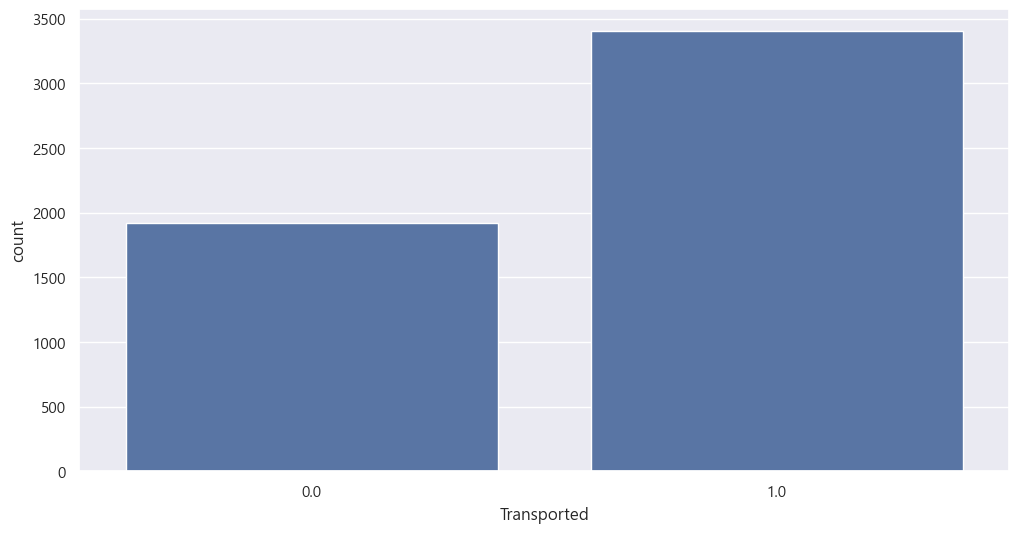

In [41]:
# Spa 이용 금액이 0인 사람들만 모아서 확인해본다.
a1 = all_df.query('Spa == 0.0')
sns.countplot(data=a1, x='Transported')
plt.show()

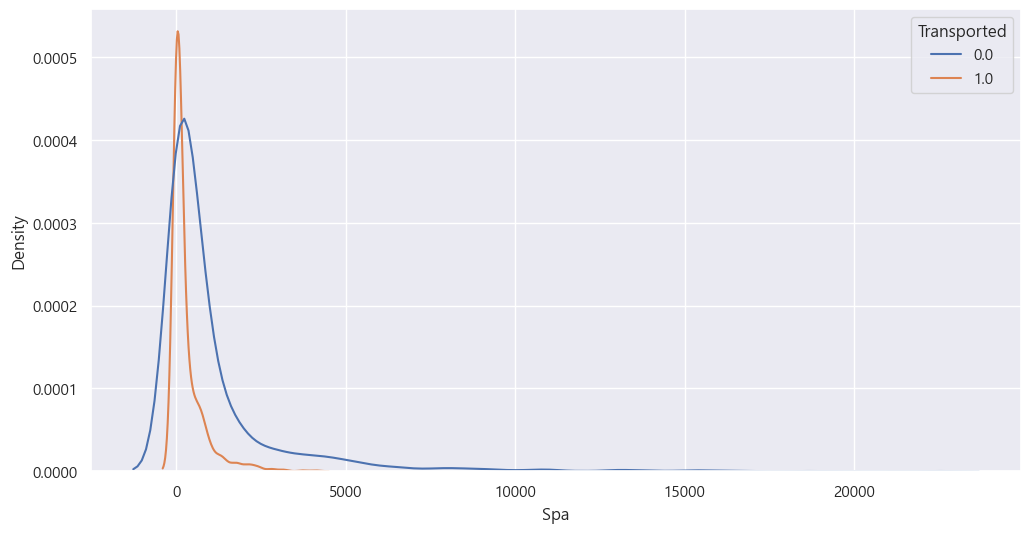

In [42]:
# Spa 이용 금액이 0보다 큰 사람들만 모아서 확인해본다.
a1 = all_df.query('Spa > 0.0')
sns.kdeplot(data=a1, x='Spa', hue='Transported')
plt.show()

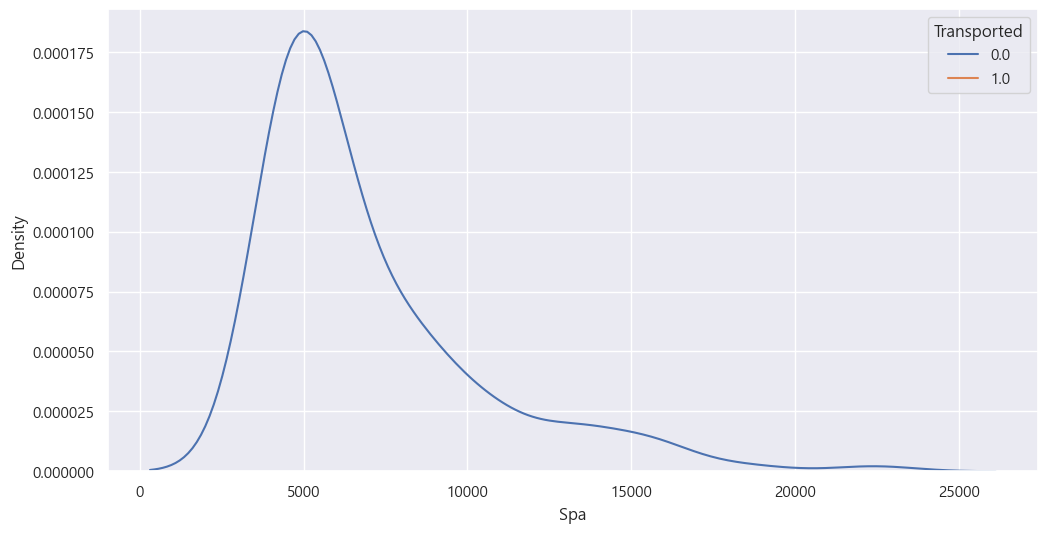

In [43]:
# Spa 이용 금액이 4000보다 큰 사람들만 모아서 확인해본다.
a1 = all_df.query('Spa > 4000.0')
sns.kdeplot(data=a1, x='Spa', hue='Transported')
plt.show()

- Spa 이용 금액이 0인 사람들은 전송됬을 확률이 높다
- Spa 이용 금액이 약 4000보다 작은 사람들은 전송됬을 확률이 높다.
- 그 외에는 전송되지 않은 사람들이 대부분을 차지한다.

### VRDeck
- VR 게임장을 이용한 총 금액

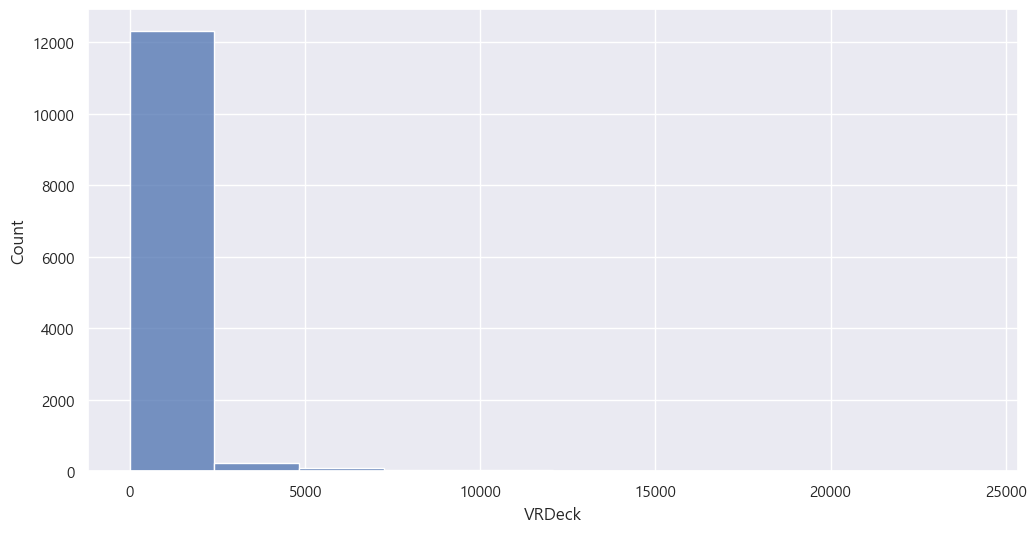

In [44]:
# 데이터의 분포를 확인한다.
sns.histplot(data=all_df, x='VRDeck', bins=10)
plt.show()

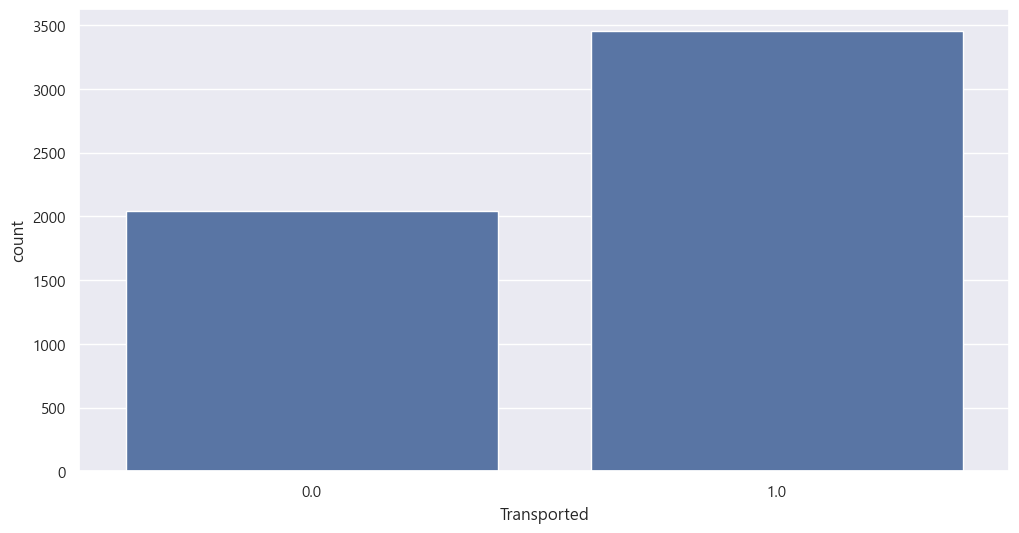

In [45]:
# VRDeck 이용 금액이 0원인 사람만 살펴본다.
a1 = all_df.query('VRDeck == 0.0')
sns.countplot(data=a1, x='Transported')
plt.show()

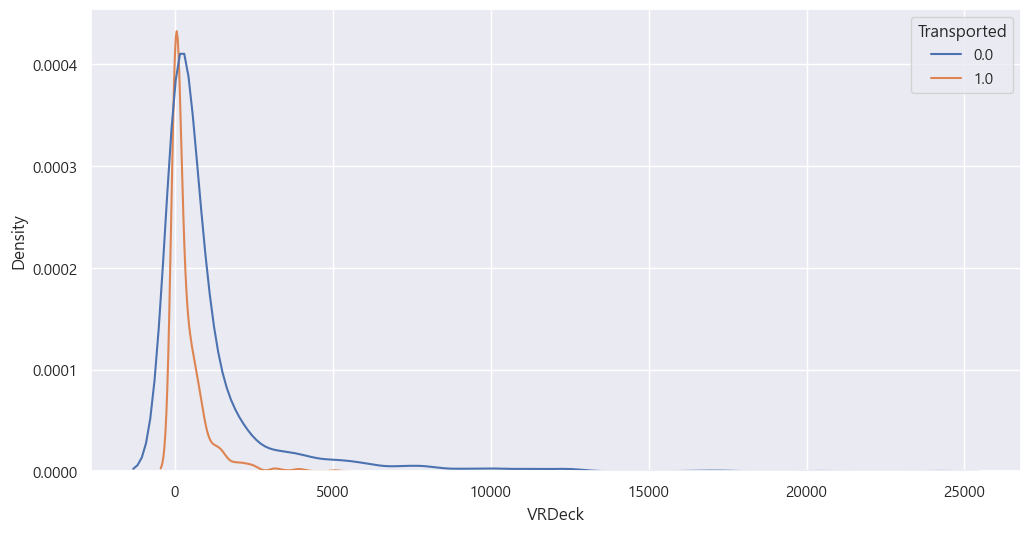

In [46]:
# VRDeck가 0보다 큰 사람들을 확인해본다.
a1 = all_df.query('VRDeck > 0.0')
sns.kdeplot(data=a1, x='VRDeck', hue='Transported')
plt.show()

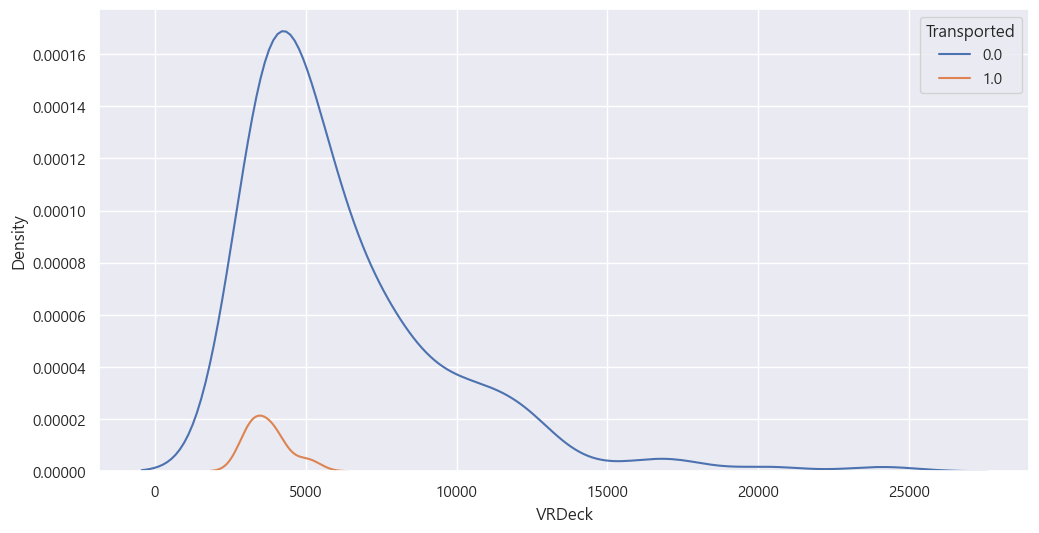

In [47]:
# VRDeck가 3000보다 큰 사람들을 확인해본다.
a1 = all_df.query('VRDeck > 3000.0')
sns.kdeplot(data=a1, x='VRDeck', hue='Transported')
plt.show()

- VRDeck 이용 금액이 없거나 매우 낮으면 전송됬을 확률이 조금 높다.
- 그 외에는 전송되지 않았을 확율이 매우 높다.

### Name
- 승객의 이름
- 앞서 LastName과 FirstName으로 나눴기 때문에 Name은 이용하지 않는다.
- 제거 대상

### GroupNumber
- 승객이 소속되어 있는 그룹 구분값
- PassengerId 컬럼을 통해 생성한 값

In [48]:
all_df['GroupNumber'].value_counts()

GroupNumber
6499    8
8728    8
984     8
4256    8
6986    8
       ..
5190    1
5187    1
5186    1
5185    1
9277    1
Name: count, Length: 9280, dtype: int64

In [49]:
a1 = all_df['GroupNumber'].value_counts()
a1.value_counts()

count
1    7145
2    1295
3     502
4     154
5      76
7      47
6      42
8      19
Name: count, dtype: int64

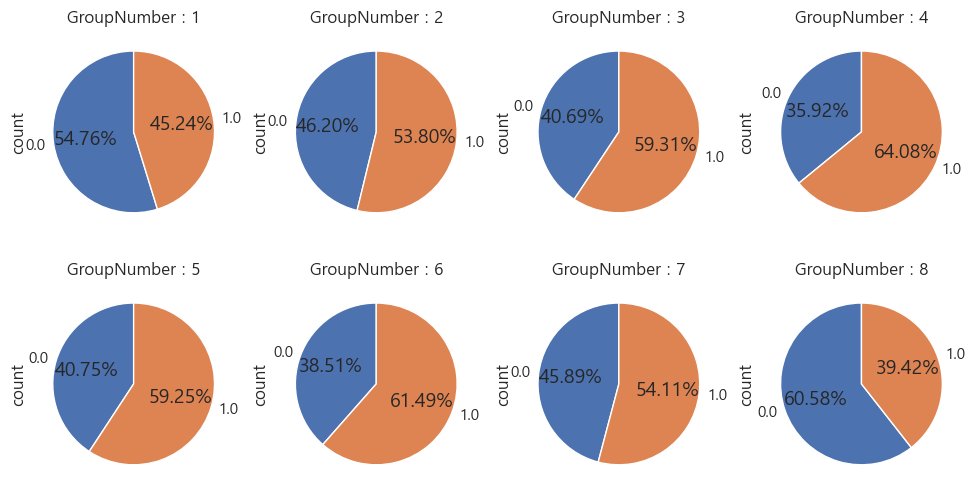

In [50]:
# GroupNumber별 사람의 수에 대한 도수
a1 = all_df['GroupNumber'].value_counts()
# 사람의 수에 대한 도수
a2 = a1.value_counts()
# 각 그룹별 사람의 수를 통해 반복한다.
for a3 in a2.index :
    plt.subplot(2, 4, a3)
    a4 = a1[a1 == a3].index
    # GroupNumber가 위에서 구한 index에 해당하는 행들을 가져온다.
    a5 = all_df.query('GroupNumber in @a4')
    a6 = a5['Transported'].value_counts()
    a6.sort_index(inplace=True)
    plt.title(f'GroupNumber : {a3}')
    a6.plot.pie(startangle=90, autopct='%.2f%%')

- GroupNumber가 0 또는 8인 경우 전송되지 않았을 확률이 높다
- 그 외에는 전송됬을 확률이 높다.

### NumberInGroup
- 그룹내에서 승객 번호.
- 그냥 그룹 내에서 1부터 1씩 증가되는 값으로 부여한 것

In [51]:
# 데이터 분포를 확인한다.
all_df['NumberInGroup'].value_counts()

NumberInGroup
1    9280
2    2135
3     840
4     338
5     184
6     108
7      66
8      19
Name: count, dtype: int64

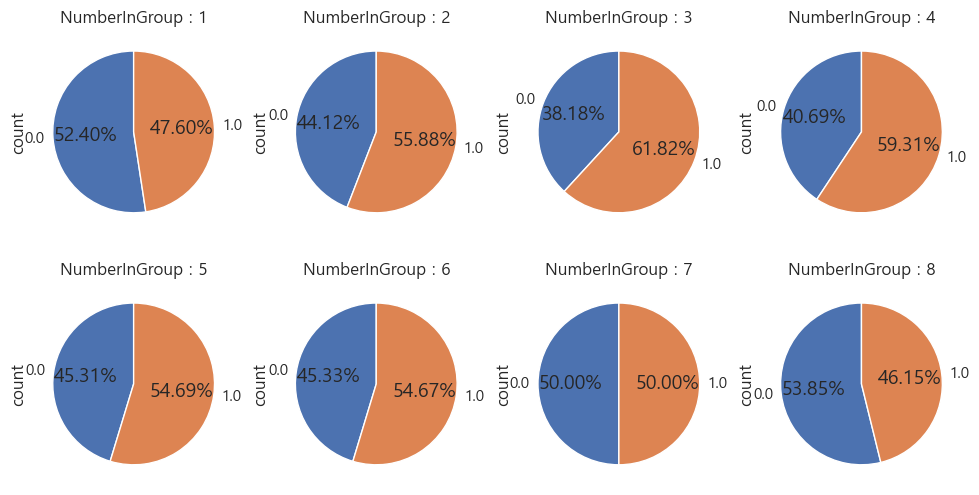

In [52]:
# 데이터의 도수를 가져온다.
a1 = all_df['NumberInGroup'].value_counts()
# 값의 종류를 통해 반복한다.
for a2 in a1.index :
    # NumberInGroup이 a2에 해당하는 행들을 가져온다.
    a3 = all_df.query('NumberInGroup == @a2')
    # Transported 비율을 그려준다.
    plt.subplot(2, 4, a2)
    a4 = a3['Transported'].value_counts()
    a4.sort_index(inplace=True)
    plt.title(f'NumberInGroup : {a2}')
    a4.plot.pie(startangle=90, autopct='%.2f%%')

plt.show()

- 1번과 8번은 전송되지 않았을 확률이 높다
- 그 외에는 전송된 확률이 높다.
- 그룹내의 승객 수와 관련이 있기 때문에 비슷한 양상을 보이는 것으로 추측된다.

### CabinDeck 
- Cabin 을 통해 생성한 데이터
- 객실이 있는 데크 정보

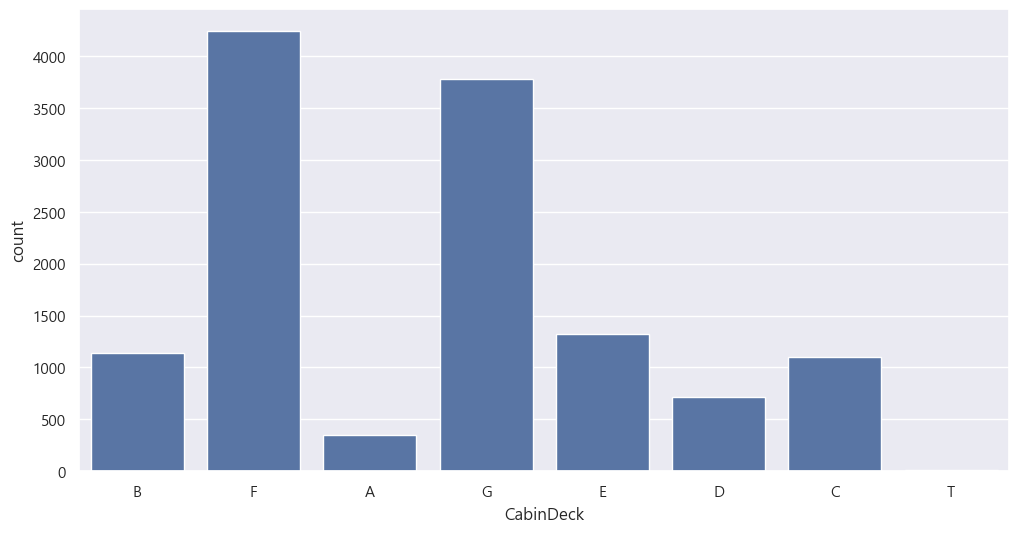

In [53]:
# 데이터 분포 확인
sns.countplot(data=all_df, x='CabinDeck')
plt.show()

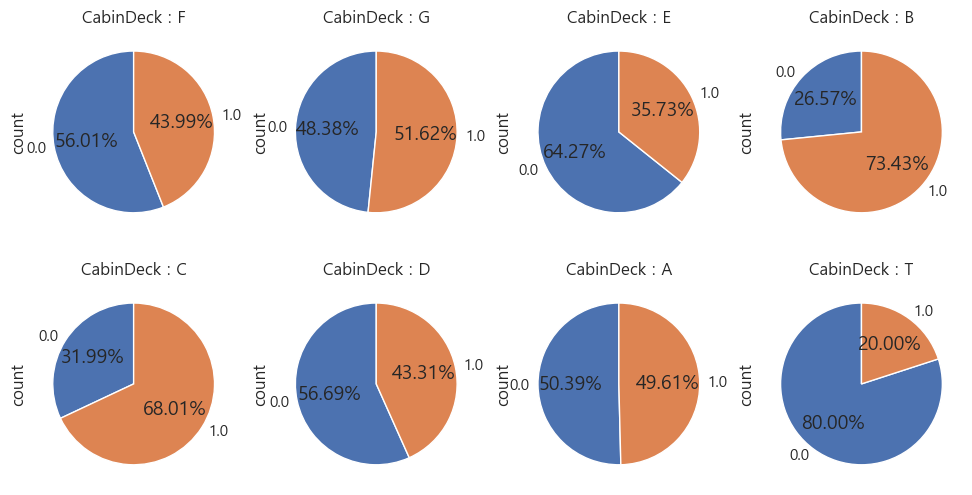

In [54]:
# 결과의 관계를 살펴본다.
a1 = all_df['CabinDeck'].value_counts()
# index를 통해 반복문을 돌린다(index가 CabinDeck 종류)
for idx, a2 in enumerate(a1.index) :
    # CabinDeck가 a2에 해당하는 행들을 가져온다.
    a3 = all_df.query('CabinDeck == @a2')

    plt.subplot(2, 4, idx + 1)
    # Transported의 비율을 확인한다.
    a4 = a3['Transported'].value_counts()
    a4.sort_index(inplace=True)
    plt.title(f'CabinDeck : {a2}')
    a4.plot.pie(startangle=90, autopct='%.2f%%')

plt.show()

- F, E, D, T 의 경우에는 전송되지 않았을 확률이 높다
- G, B, C 는 전송됐을 확률이 높다
- A는 비슷하다

### CabinNumber
- 객실 번호

In [55]:
# Deck가 다르지만 객실 번호가 같은 것들이 있는지 확인해본다.
display(all_df.query('CabinDeck == "A"')['CabinNumber'].min())
display(all_df.query('CabinDeck == "B"')['CabinNumber'].min())
display(all_df.query('CabinDeck == "C"')['CabinNumber'].min())
display(all_df.query('CabinDeck == "D"')['CabinNumber'].min())
display(all_df.query('CabinDeck == "E"')['CabinNumber'].min())
display(all_df.query('CabinDeck == "F"')['CabinNumber'].min())
display(all_df.query('CabinDeck == "G"')['CabinNumber'].min())
display(all_df.query('CabinDeck == "T"')['CabinNumber'].min())

0.0

0.0

0.0

0.0

0.0

0.0

0.0

0.0

In [56]:
# 객실번호 분포
display(all_df.query('CabinDeck == "A"')['CabinNumber'].agg(['min', 'max']))
display(all_df.query('CabinDeck == "B"')['CabinNumber'].agg(['min', 'max']))
display(all_df.query('CabinDeck == "C"')['CabinNumber'].agg(['min', 'max']))
display(all_df.query('CabinDeck == "D"')['CabinNumber'].agg(['min', 'max']))
display(all_df.query('CabinDeck == "E"')['CabinNumber'].agg(['min', 'max']))
display(all_df.query('CabinDeck == "F"')['CabinNumber'].agg(['min', 'max']))
display(all_df.query('CabinDeck == "G"')['CabinNumber'].agg(['min', 'max']))
display(all_df.query('CabinDeck == "T"')['CabinNumber'].agg(['min', 'max']))

min      0.0
max    109.0
Name: CabinNumber, dtype: float64

min      0.0
max    353.0
Name: CabinNumber, dtype: float64

min      0.0
max    342.0
Name: CabinNumber, dtype: float64

min      0.0
max    297.0
Name: CabinNumber, dtype: float64

min      0.0
max    608.0
Name: CabinNumber, dtype: float64

min       0.0
max    1894.0
Name: CabinNumber, dtype: float64

min       0.0
max    1508.0
Name: CabinNumber, dtype: float64

min    0.0
max    4.0
Name: CabinNumber, dtype: float64

- Deck가 달라지면 객실 번호는 다시 0부터 시작을 한다.
- Deck마다 객실의 수가 다르다.
- 특히 T는 매우 적다.

- CabinNumber는 일단 제외한다

### CabinSide
- 객실 내에서 좌석 위치

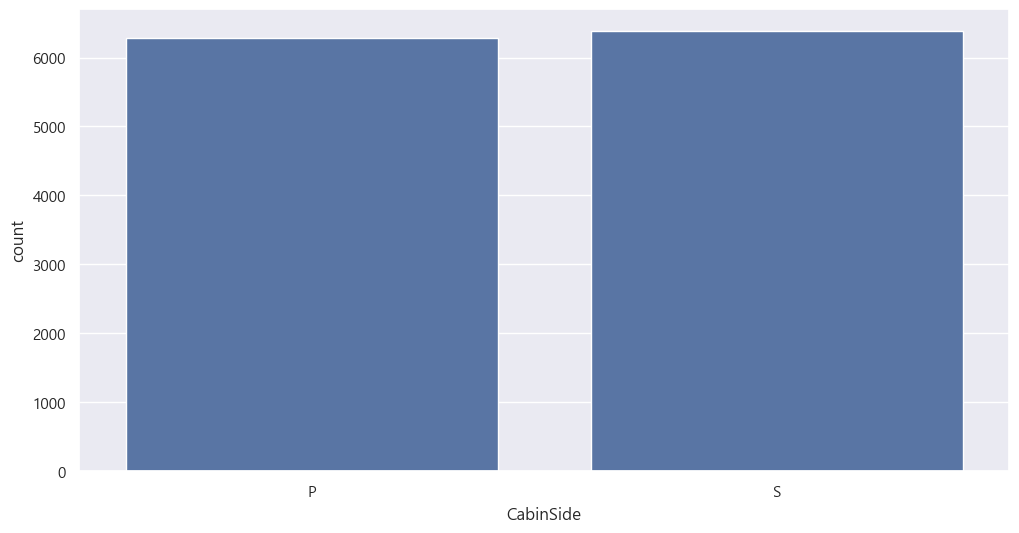

In [57]:
# 데이터 분포 확인
sns.countplot(data=all_df, x='CabinSide')
plt.show()

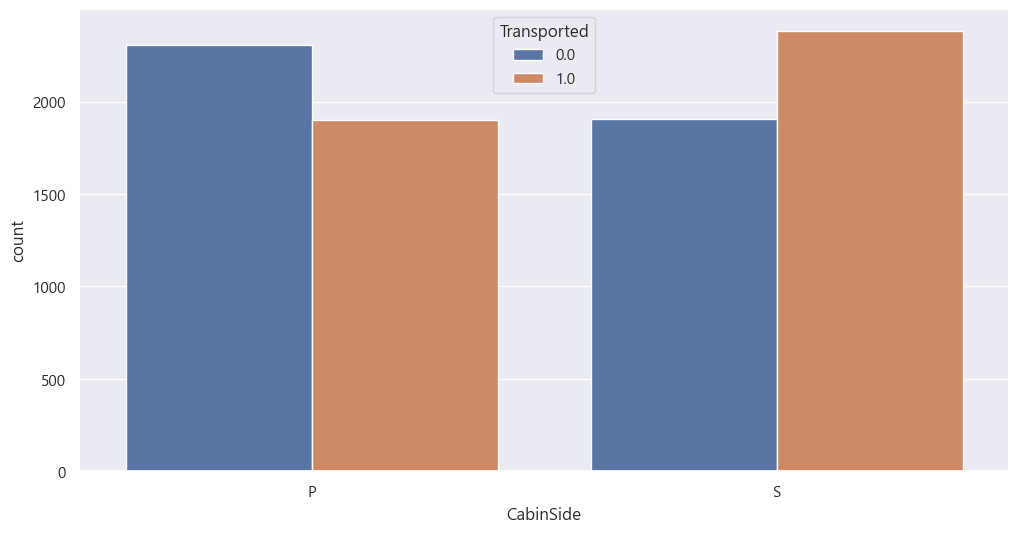

In [58]:
# 결과의 관계를 살펴본다.
sns.countplot(data=all_df, x='CabinSide', hue='Transported')
plt.show()

- P 인 경우에는 전송되지 않았을 확률이 높다
- S 인 경우에는 전송됬을 확률이 높다.

### CabinNumber를 다시본다
- 만약 CabinSide가 분석하기 어려운 상태였다면 CabinDeck, CabinNumber, CabinSide를 버리고 Cabin에 대한 분석을 하려고 했다.
- 허나 CabinDeck, CabinSide가 의미가 있는 분석결과가 나왔다
- 이에 CabinNumber를 버릴 것인지 아닌지를 결정한다.
- 이에 데이터 명세서에는 없지만 일반적인 사회적 통념을 기반으로 분석을 해본다(매우 위험한 행동)

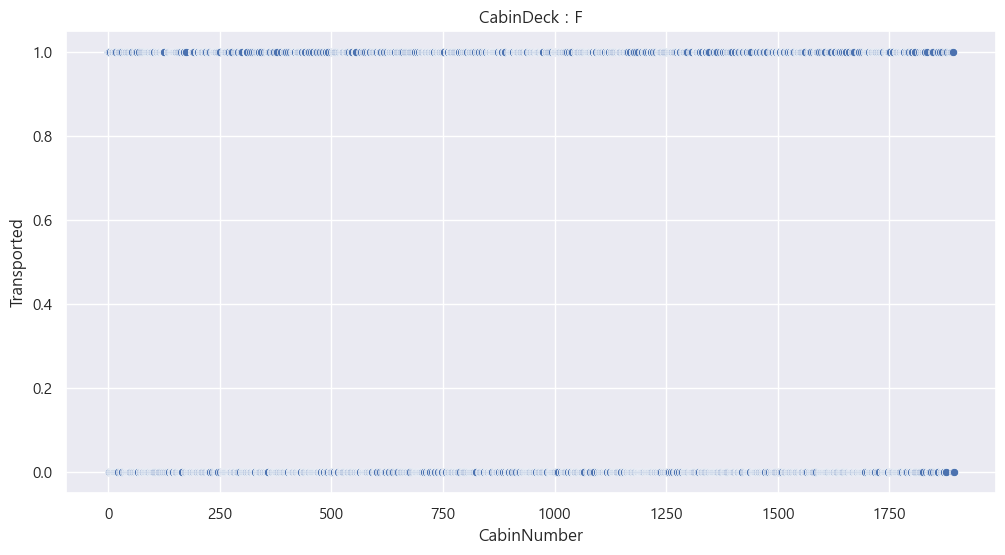

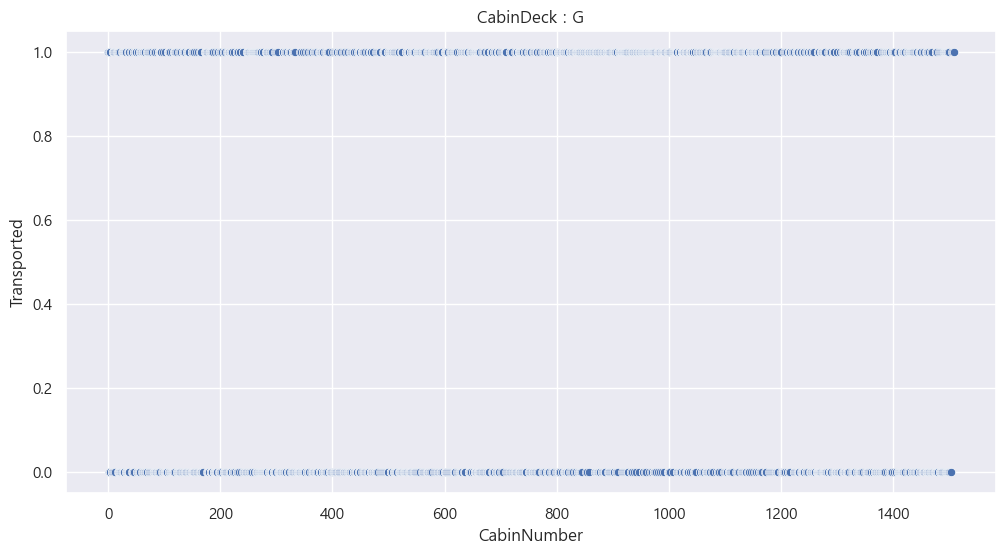

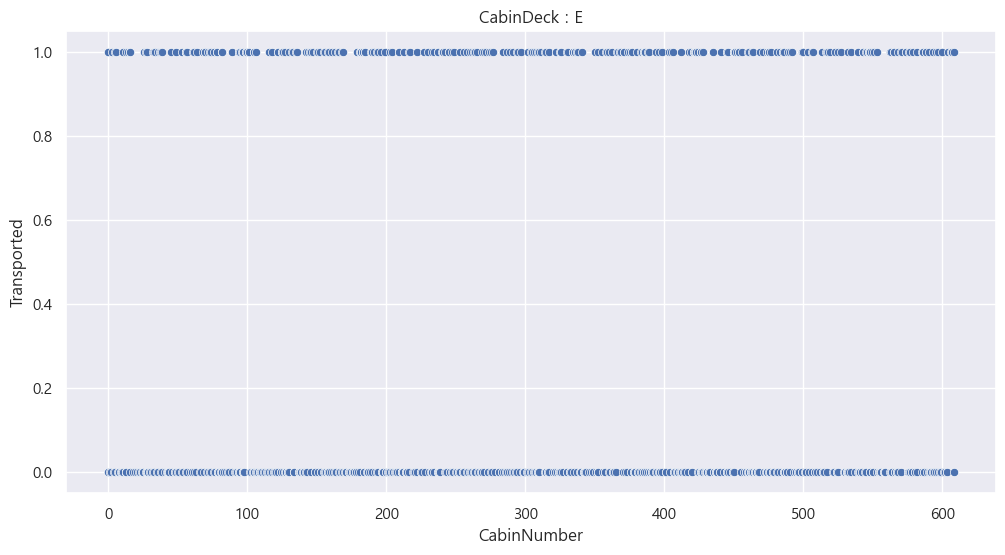

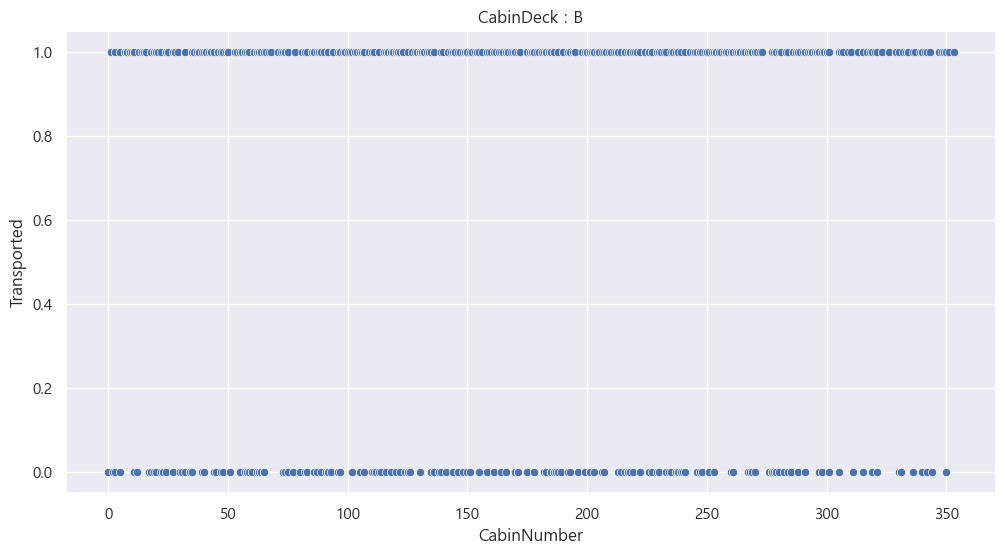

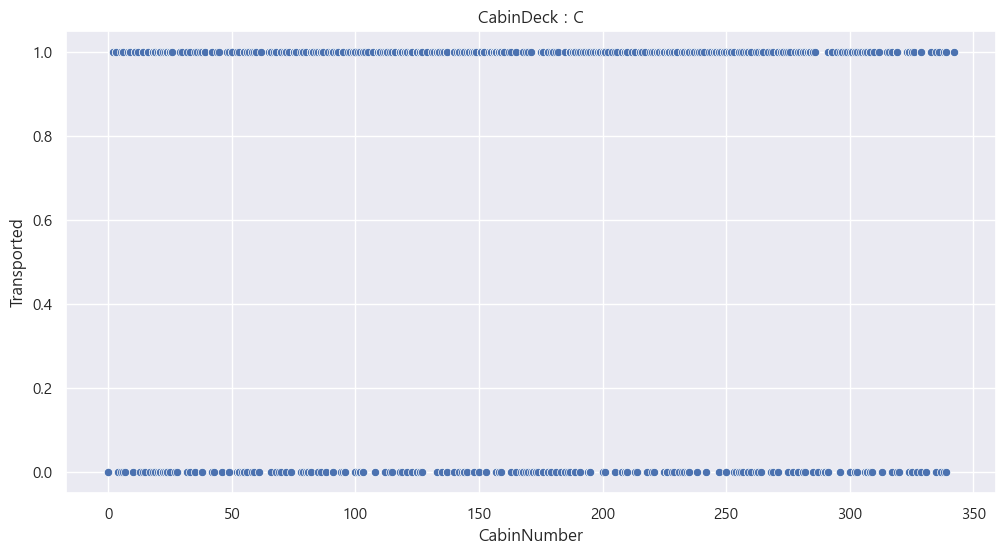

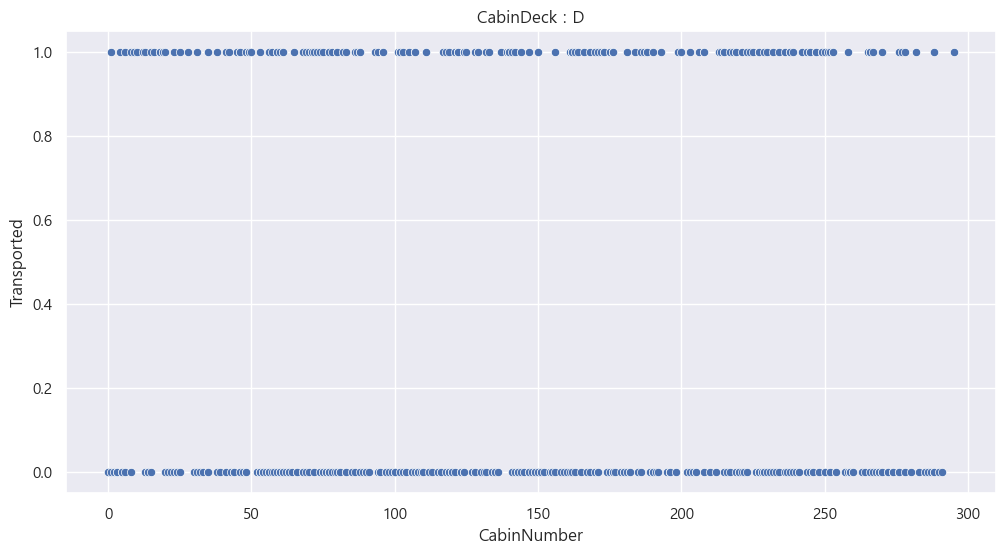

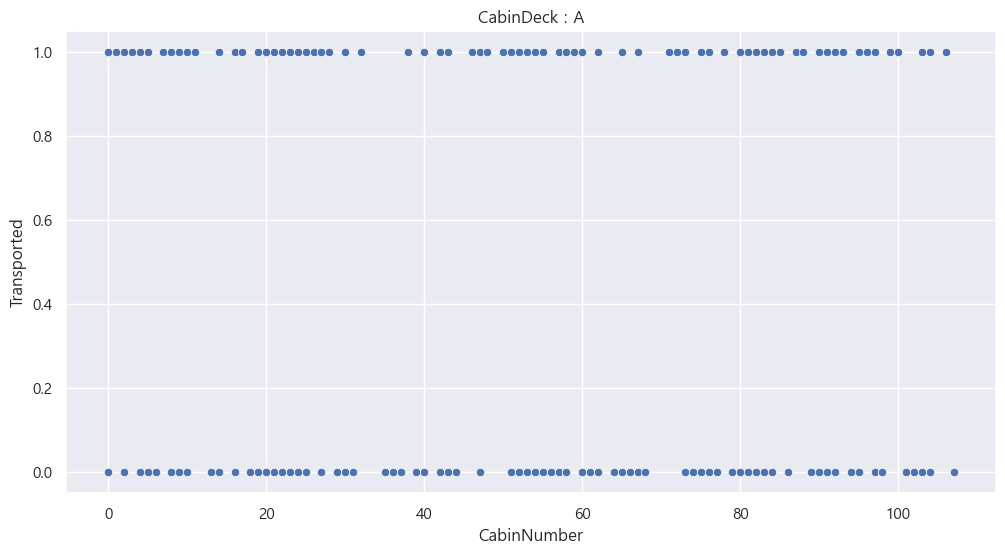

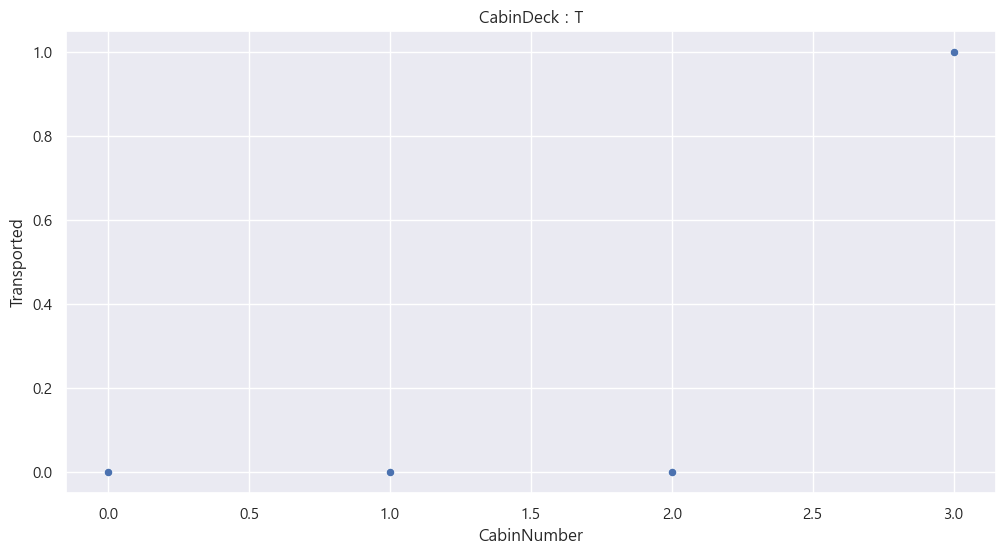

In [59]:
# 사회적 통념상 객실은 작은 번호에서 부터 큰 번호로 부여가 된다.
# 따라서 객실 번호가 비슷하면 비슷한 위치에 있는 것으로 볼 수 있다.
# 객실 번호를 기준으로 정렬을 해서 전송되었는지 아닌지를 산점도로 확인해본다.

# Deck의 종류를 통해 반복한다.
a100 = all_df['CabinDeck'].value_counts().index

for a200 in a100 :
    a1 = all_df.query('CabinDeck == @a200')
    a1.sort_values('CabinNumber', inplace=True)
    a1.reset_index(inplace=True, drop=True)
    plt.title(f'CabinDeck : {a200}')
    sns.scatterplot(data=a1, x='CabinNumber', y='Transported')
    plt.show()

- 객실 번호가 작은쪽과 큰 쪽의 패턴이 다르지 않다.

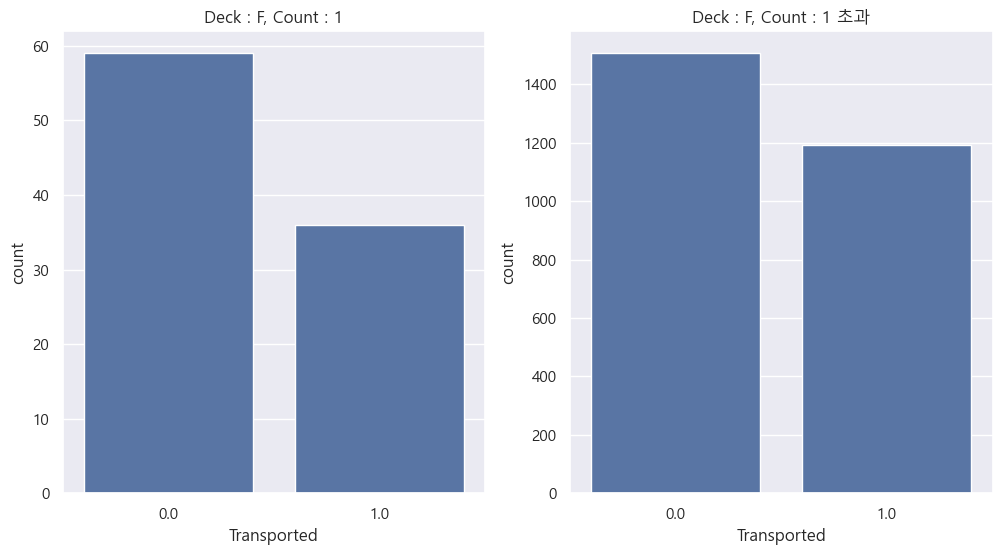

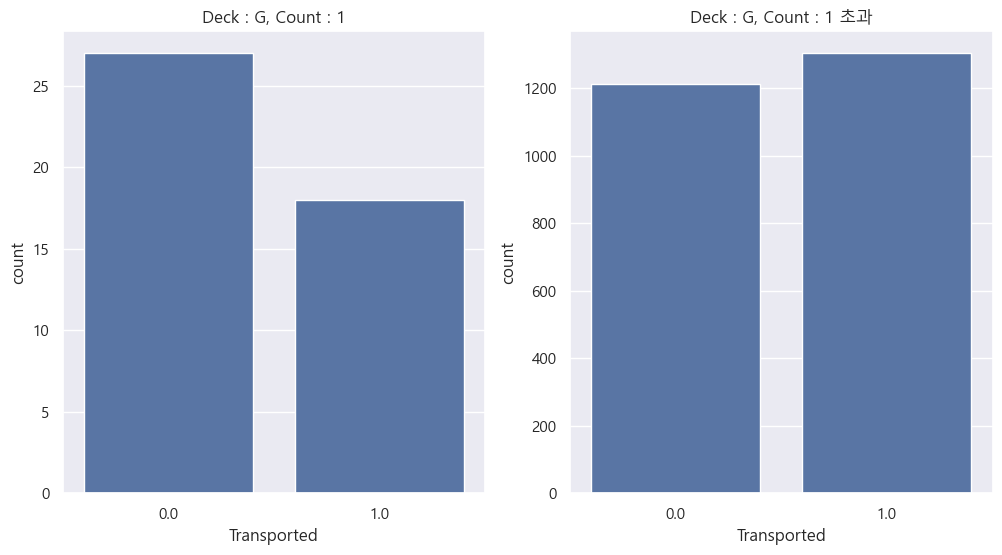

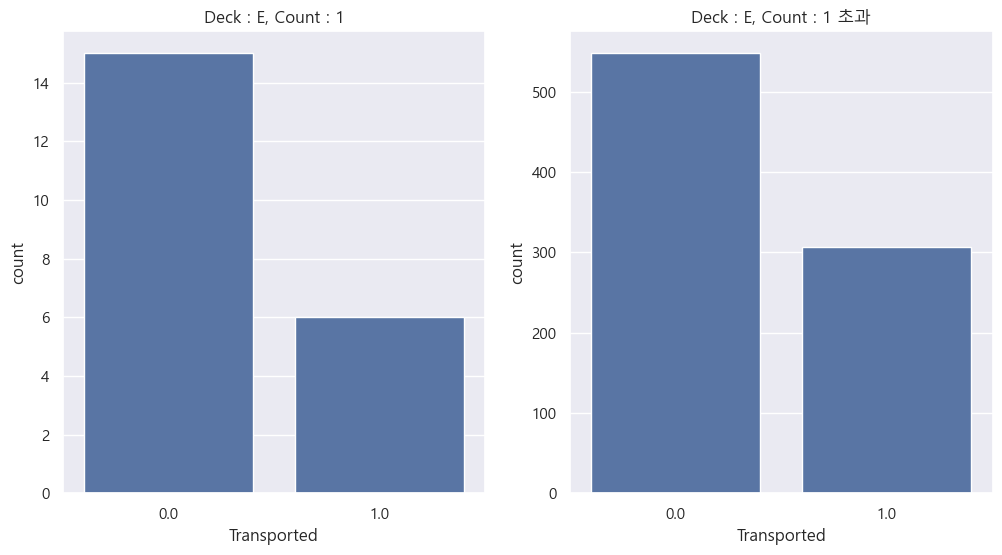

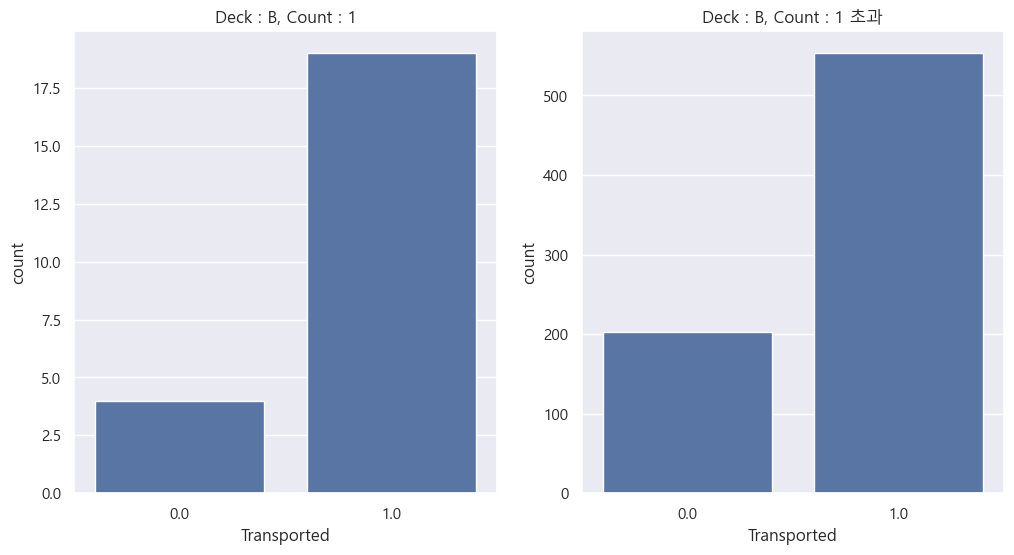

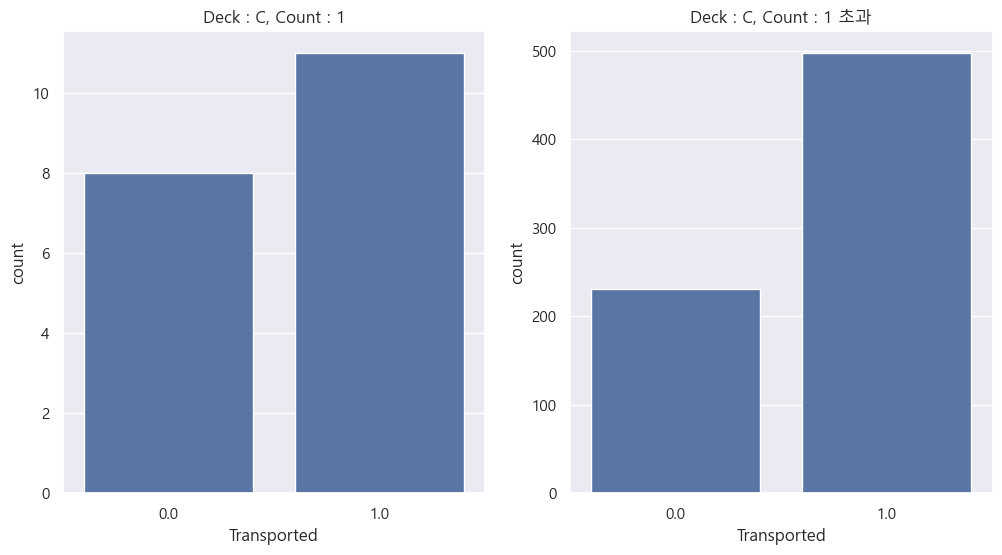

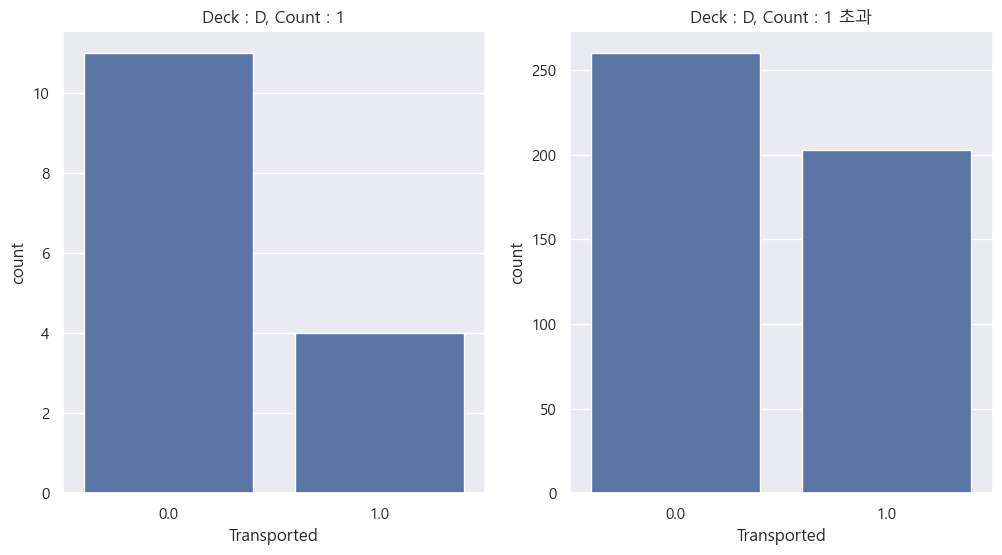

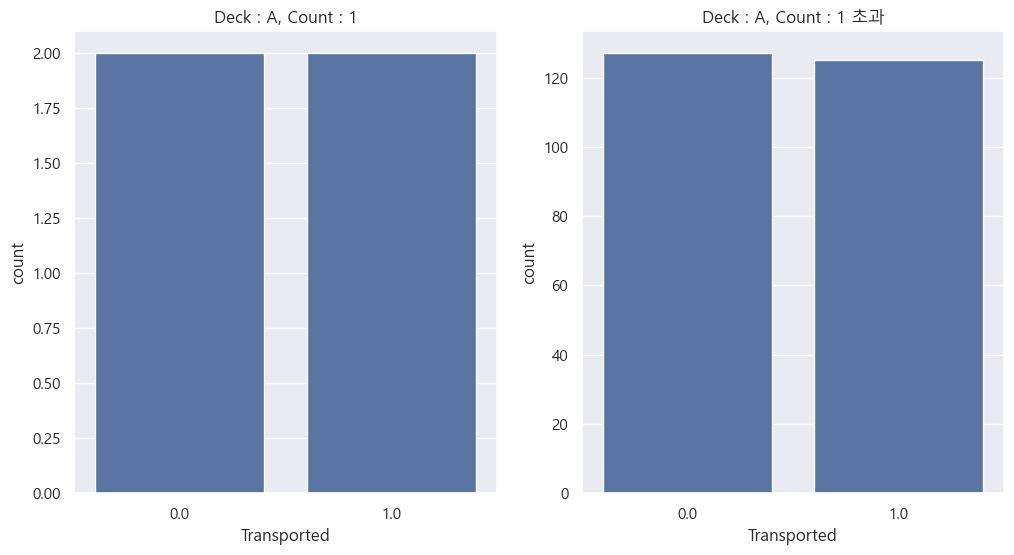

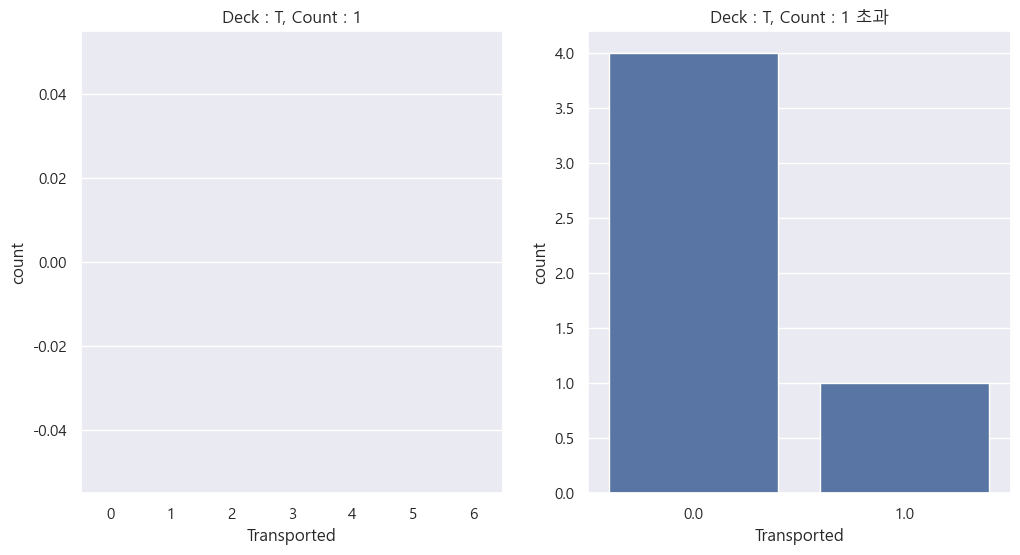

In [60]:
a1 = all_df.groupby(['CabinDeck', 'CabinNumber'], as_index=False)['PassengerId'].count()
a1.columns = ['CabinDeck', 'CabinNumber', 'Count']

# Deck의 종류를 통해 반복한다.
a100 = a1['CabinDeck'].value_counts().index

for a200 in a100 :
    # Count가 1인 것만 가져온다.
    plt.subplot(1, 2, 1)
    a2 = a1.query('Count == 1')
    a3 = a2.query('CabinDeck == @a200')
    a4 = a3['CabinNumber'].values
    a5 = all_df.query('CabinDeck == @a200 and CabinNumber in @a4')
    plt.title(f'Deck : {a200}, Count : 1')
    sns.countplot(data=a5, x='Transported')
    
    # Count가 1보다 큰 것만 가져온다.
    plt.subplot(1, 2, 2)
    a2 = a1.query('Count > 1')
    a3 = a2.query('CabinDeck == @a200')
    a4 = a3['CabinNumber'].values
    a5 = all_df.query('CabinDeck == @a200 and CabinNumber in @a4')
    plt.title(f'Deck : {a200}, Count : 1 초과')
    sns.countplot(data=a5, x='Transported')
    
    plt.show()

- 각 Deck별 객실에 있는 사람의 수에 대한 결과 분석을 해보았지만 별다른 의미를 찾을 수가 없다
- CabinNumber는 버린다.

### FirstName
- 이름의 일부분

In [61]:
# 데이터의 분포 확인
all_df['FirstName'].value_counts()

FirstName
Buckentry      19
Belley         19
Hinglendez     18
Fowlesterez    18
Casonston      18
               ..
Cabraseed       1
Miste           1
Imotive         1
Gepie           1
Replic          1
Name: count, Length: 2406, dtype: int64

In [62]:
# 도수를 구해 변수에 담는다.
a1 = all_df['FirstName'].value_counts()
# 도수가 같은 것들이 몇개씩 있는지 확인한다.
a1.value_counts()

count
2     321
3     304
4     301
5     288
6     242
7     215
1     208
8     141
9     130
10     88
11     57
12     43
14     23
13     18
15     11
16      8
18      3
17      3
19      2
Name: count, dtype: int64

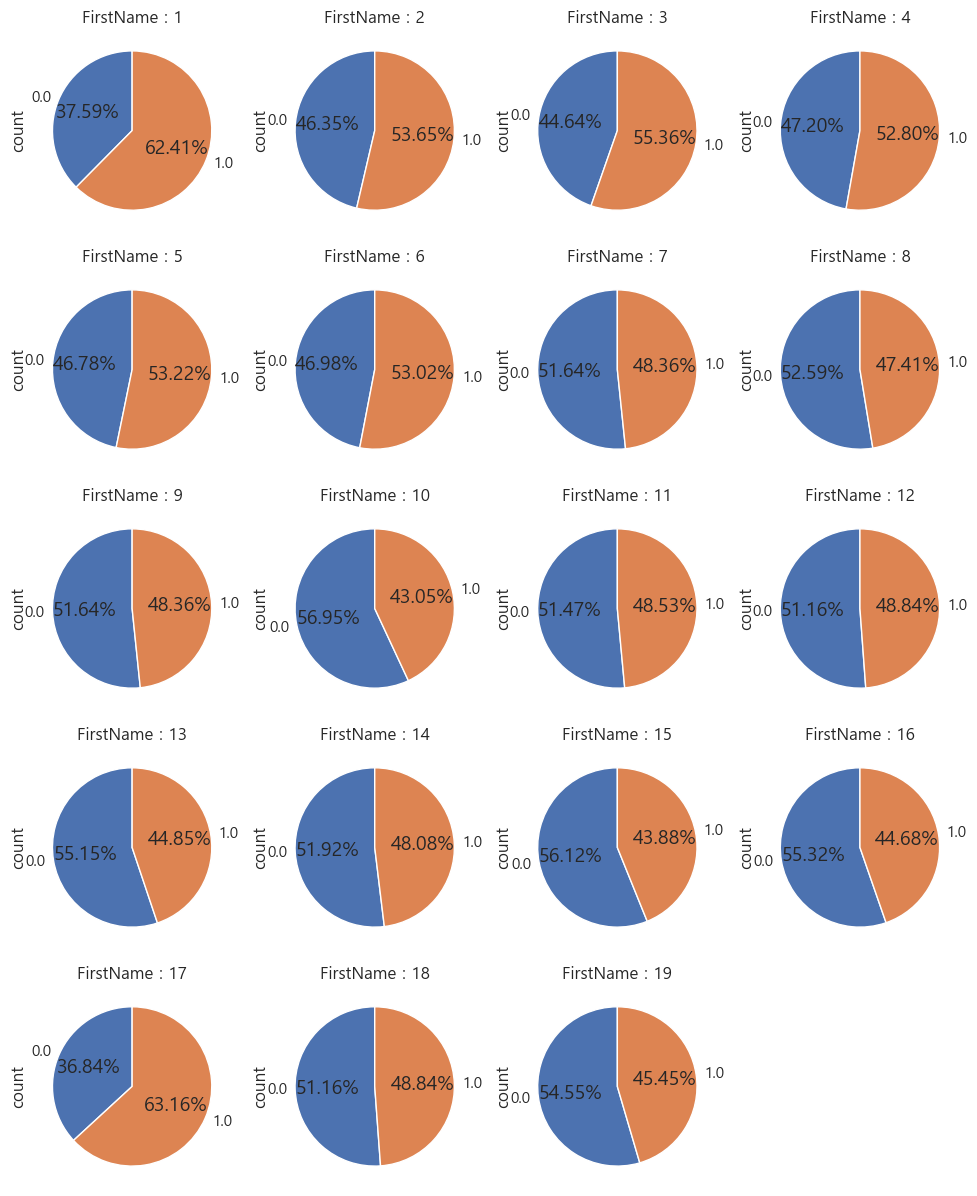

In [63]:
plt.rcParams['figure.figsize'] = 12, 15

# FirstName별 사람의 수에 대한 도수
a1 = all_df['FirstName'].value_counts()
# 사람의 수에 대한 도수
a2 = a1.value_counts()
a2.sort_index(inplace=True)
# 각 그룹별 사람의 수를 통해 반복한다.
for a3 in a2.index :
    plt.subplot(5, 4, a3)
    a4 = a1[a1 == a3].index
    # GroupNumber가 위에서 구한 index에 해당하는 행들을 가져온다.
    a5 = all_df.query('FirstName in @a4')
    a6 = a5['Transported'].value_counts()
    a6.sort_index(inplace=True)
    plt.title(f'FirstName : {a3}')
    a6.plot.pie(startangle=90, autopct='%.2f%%')

plt.rcParams['figure.figsize'] = 12, 6

- FirstName이 같은 사람의 수가 1 ~ 6명, 17명인 경우에는 전송됬을 확률이 높다
- 그 외에는 전송되지 않을 확률이 높다.

### LastName
- 이름의 일부분
- FirstName과 동일한 과정으로 살펴본다.

In [64]:
# 도수를 구해 변수에 담는다.
a1 = all_df['LastName'].value_counts()
# 도수가 같은 것들이 몇개씩 있는지 확인한다.
a2 = a1.value_counts()
a2.sort_index(inplace=True)
a2

count
1     339
2     463
3     490
4     425
5     330
6     244
7     180
8     136
9     130
10     65
11     45
12     16
13     13
14      4
15      1
16      2
Name: count, dtype: int64

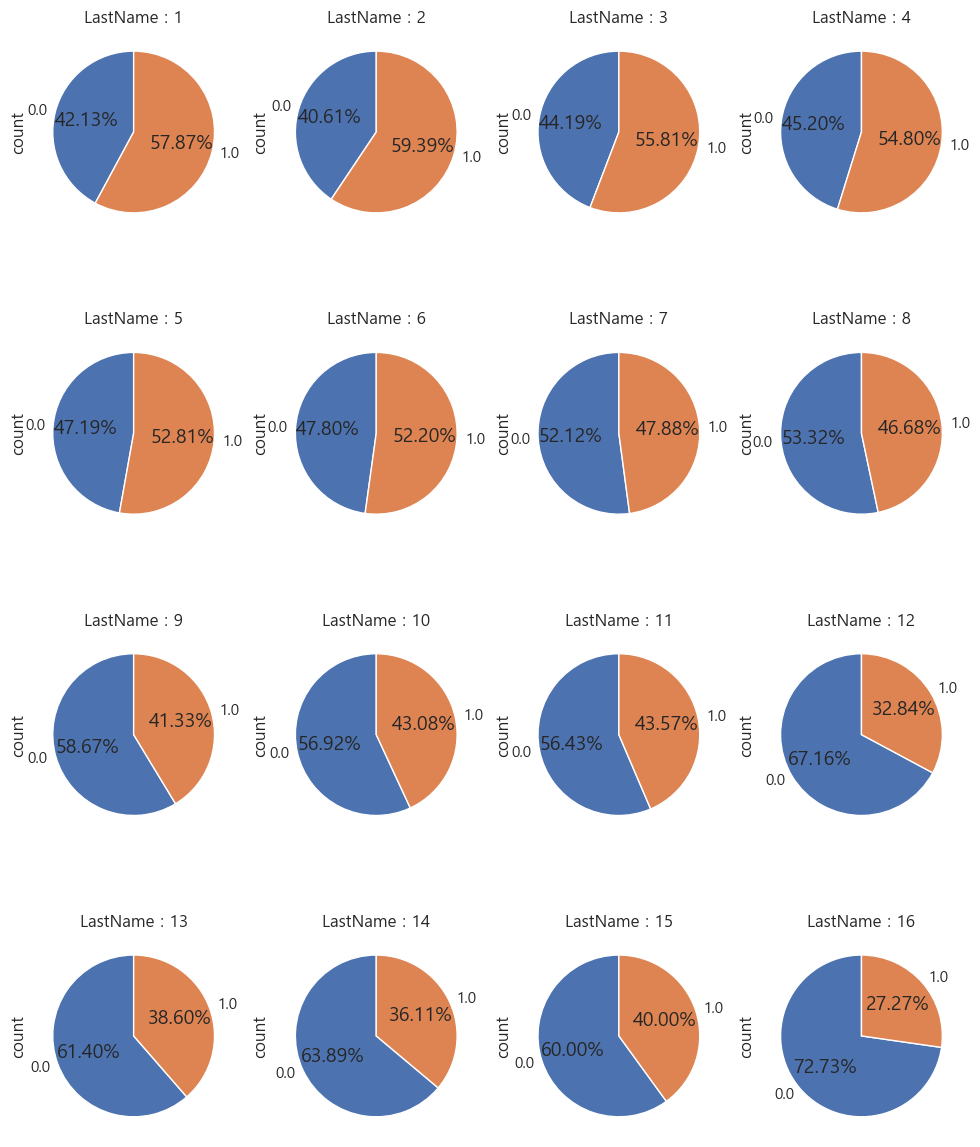

In [65]:
plt.rcParams['figure.figsize'] = 12, 15

# LastName별 사람의 수에 대한 도수
a1 = all_df['LastName'].value_counts()
# 사람의 수에 대한 도수
a2 = a1.value_counts()
a2.sort_index(inplace=True)
# 각 그룹별 사람의 수를 통해 반복한다.
for a3 in a2.index :
    plt.subplot(4, 4, a3)
    a4 = a1[a1 == a3].index
    # GroupNumber가 위에서 구한 index에 해당하는 행들을 가져온다.
    a5 = all_df.query('LastName in @a4')
    a6 = a5['Transported'].value_counts()
    a6.sort_index(inplace=True)
    plt.title(f'LastName : {a3}')
    a6.plot.pie(startangle=90, autopct='%.2f%%')

plt.rcParams['figure.figsize'] = 12, 6

- 6명 이하인 경우에는 전송 되었을 확률이 높다
- 7명 이상인 경우에는 전송되지 않았을 확률이 높다.

### Ages
- 연령대

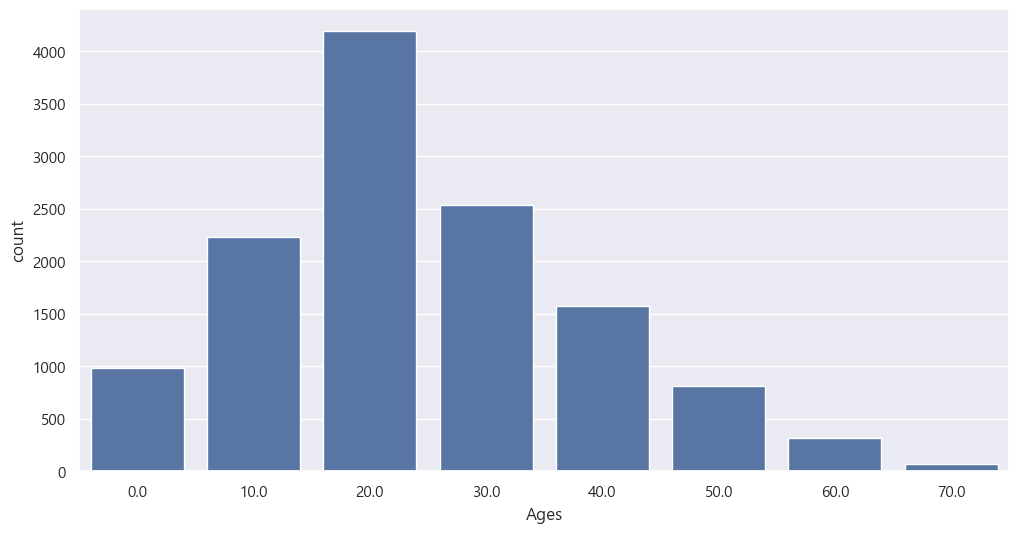

In [66]:
# 데이터의 분포를 확인한다.
sns.countplot(data=all_df, x='Ages')
plt.show()

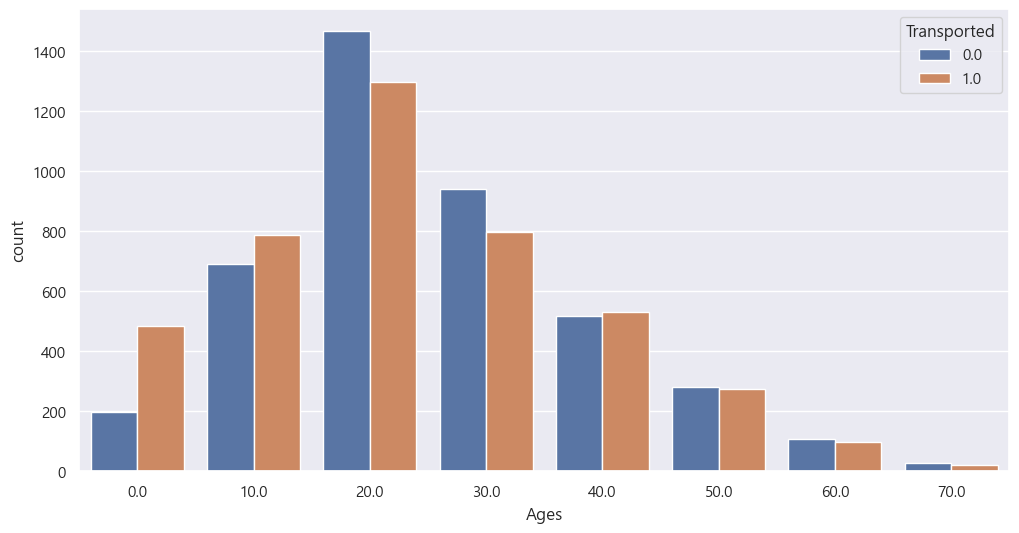

In [67]:
# 결과의 관계를 살펴본다.
sns.countplot(data=all_df, x='Ages', hue='Transported')
plt.show()

- 0대, 10대는 전송됬을 확률이 높다
- 20대, 30대는 전송되지 않았을 확률이 높다
- 그 이상은 비슷하다.

### 지금까지의 데이터를 저장한다

In [75]:
train3 = all_df.query('Transported.notna()')
train3.reset_index(inplace=True, drop=True)

test3 = all_df.query('Transported.isna()')
test3.reset_index(inplace=True, drop=True)
test3.drop('Transported', axis=1, inplace=True)

train3.to_csv('data/spaceship_train3.csv', index=False)
test3.to_csv('data/spaceship_test3.csv', index=False)

In [76]:
train_temp = pd.read_csv('data/spaceship_train3.csv')
test_temp = pd.read_csv('data/spaceship_test3.csv')

display(train_temp)
display(test_temp)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,Transported,GroupNumber,NumberInGroup,CabinDeck,CabinNumber,CabinSide,FirstName,LastName,Ages,RoomServiceGrade
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,...,0.0,1,1,B,0.0,P,Ofracculy,Maham,30.0,0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,...,1.0,2,1,F,0.0,S,Vines,Juanna,20.0,1
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,...,0.0,3,1,A,0.0,S,Susent,Altark,50.0,1
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,...,0.0,3,2,A,0.0,S,Susent,Solam,30.0,0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,...,1.0,4,1,F,1.0,S,Santantines,Willy,10.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,...,0.0,9276,1,A,98.0,P,Noxnuther,Gravior,40.0,0
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,...,0.0,9278,1,G,1499.0,S,Mondalley,Kurta,10.0,0
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,...,1.0,9279,1,G,1500.0,S,Connon,Fayey,20.0,0
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,...,0.0,9280,1,E,608.0,S,Hontichre,Celeon,30.0,0


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,Name,GroupNumber,NumberInGroup,CabinDeck,CabinNumber,CabinSide,FirstName,LastName,Ages,RoomServiceGrade
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,...,Nelly Carsoning,13,1,G,3.0,S,Carsoning,Nelly,20.0,0
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,...,Lerome Peckers,18,1,F,4.0,S,Peckers,Lerome,10.0,0
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,...,Sabih Unhearfus,19,1,C,0.0,S,Unhearfus,Sabih,30.0,0
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,...,Meratz Caltilter,21,1,C,1.0,S,Caltilter,Meratz,30.0,0
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,...,Brence Harperez,23,1,F,5.0,S,Harperez,Brence,20.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,...,Jeron Peter,9266,2,G,1496.0,S,Peter,Jeron,30.0,0
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,...,Matty Scheron,9269,1,NaN,NaN,NaN,Scheron,Matty,40.0,0
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,...,Jayrin Pore,9271,1,D,296.0,P,Pore,Jayrin,NaN,0
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,...,Kitakan Conale,9273,1,D,297.0,P,Conale,Kitakan,NaN,0
